In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition  import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='rainbow')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [4]:
df= df.iloc[:,:-1]
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62


In [5]:
sc = StandardScaler()
scaled = sc.fit_transform(df)

# PCA

In [6]:
pca = PCA()
pd.DataFrame(pca.fit_transform(scaled))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.260580,1.736054,-0.405701,0.687419,0.200386,-0.359880,0.632731,0.046907,-0.820645,0.618012,0.465836,0.486805,0.294675
1,-2.358620,-0.509786,-1.937094,0.080793,-0.530808,-0.934456,0.010388,-1.011932,-0.112133,-0.187387,0.378904,0.182328,0.105390
2,-2.453376,1.120704,0.892834,-0.782643,0.378624,0.569583,0.415002,0.114857,-0.576821,-0.922386,0.033796,-0.115035,-0.161369
3,-3.253148,2.686416,-0.411249,-0.555531,0.087066,0.271407,-0.414701,-0.644758,0.281428,0.626387,-0.178538,0.324122,-0.197160
4,-1.403734,1.320100,1.854434,0.503217,-0.285707,-0.666474,0.515031,-0.347955,-0.184441,-0.123972,-0.269699,-0.190014,-0.338264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.886054,1.707484,-0.443465,-1.264981,-0.032341,-1.103732,0.851965,0.215097,0.414076,-0.093161,0.177757,0.181033,0.034659
174,3.148970,1.386257,0.127645,-0.165248,0.457328,-0.006777,0.108374,0.530442,0.253675,-0.026677,-0.250032,0.086710,-0.127952
175,3.384134,2.255285,-1.133039,0.505402,1.098278,0.071138,0.708909,-0.072243,0.348921,0.155599,0.748714,-0.218622,-0.075851
176,3.078204,1.791104,-0.639500,1.109167,0.294664,1.019720,0.737921,-0.440155,-0.289070,0.444341,0.366244,0.076042,0.035184


In [7]:
pca.explained_variance_ratio_

array([0.3996507 , 0.16770494, 0.10920338, 0.0683296 , 0.06528109,
       0.05148865, 0.04248671, 0.02680753, 0.02028839, 0.01995798,
       0.01304329, 0.01042324, 0.00533449])

In [8]:
np.cumsum(pca.explained_variance_ratio_)

array([0.3996507 , 0.56735564, 0.67655902, 0.74488863, 0.81016972,
       0.86165837, 0.90414508, 0.93095261, 0.951241  , 0.97119898,
       0.98424227, 0.99466551, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

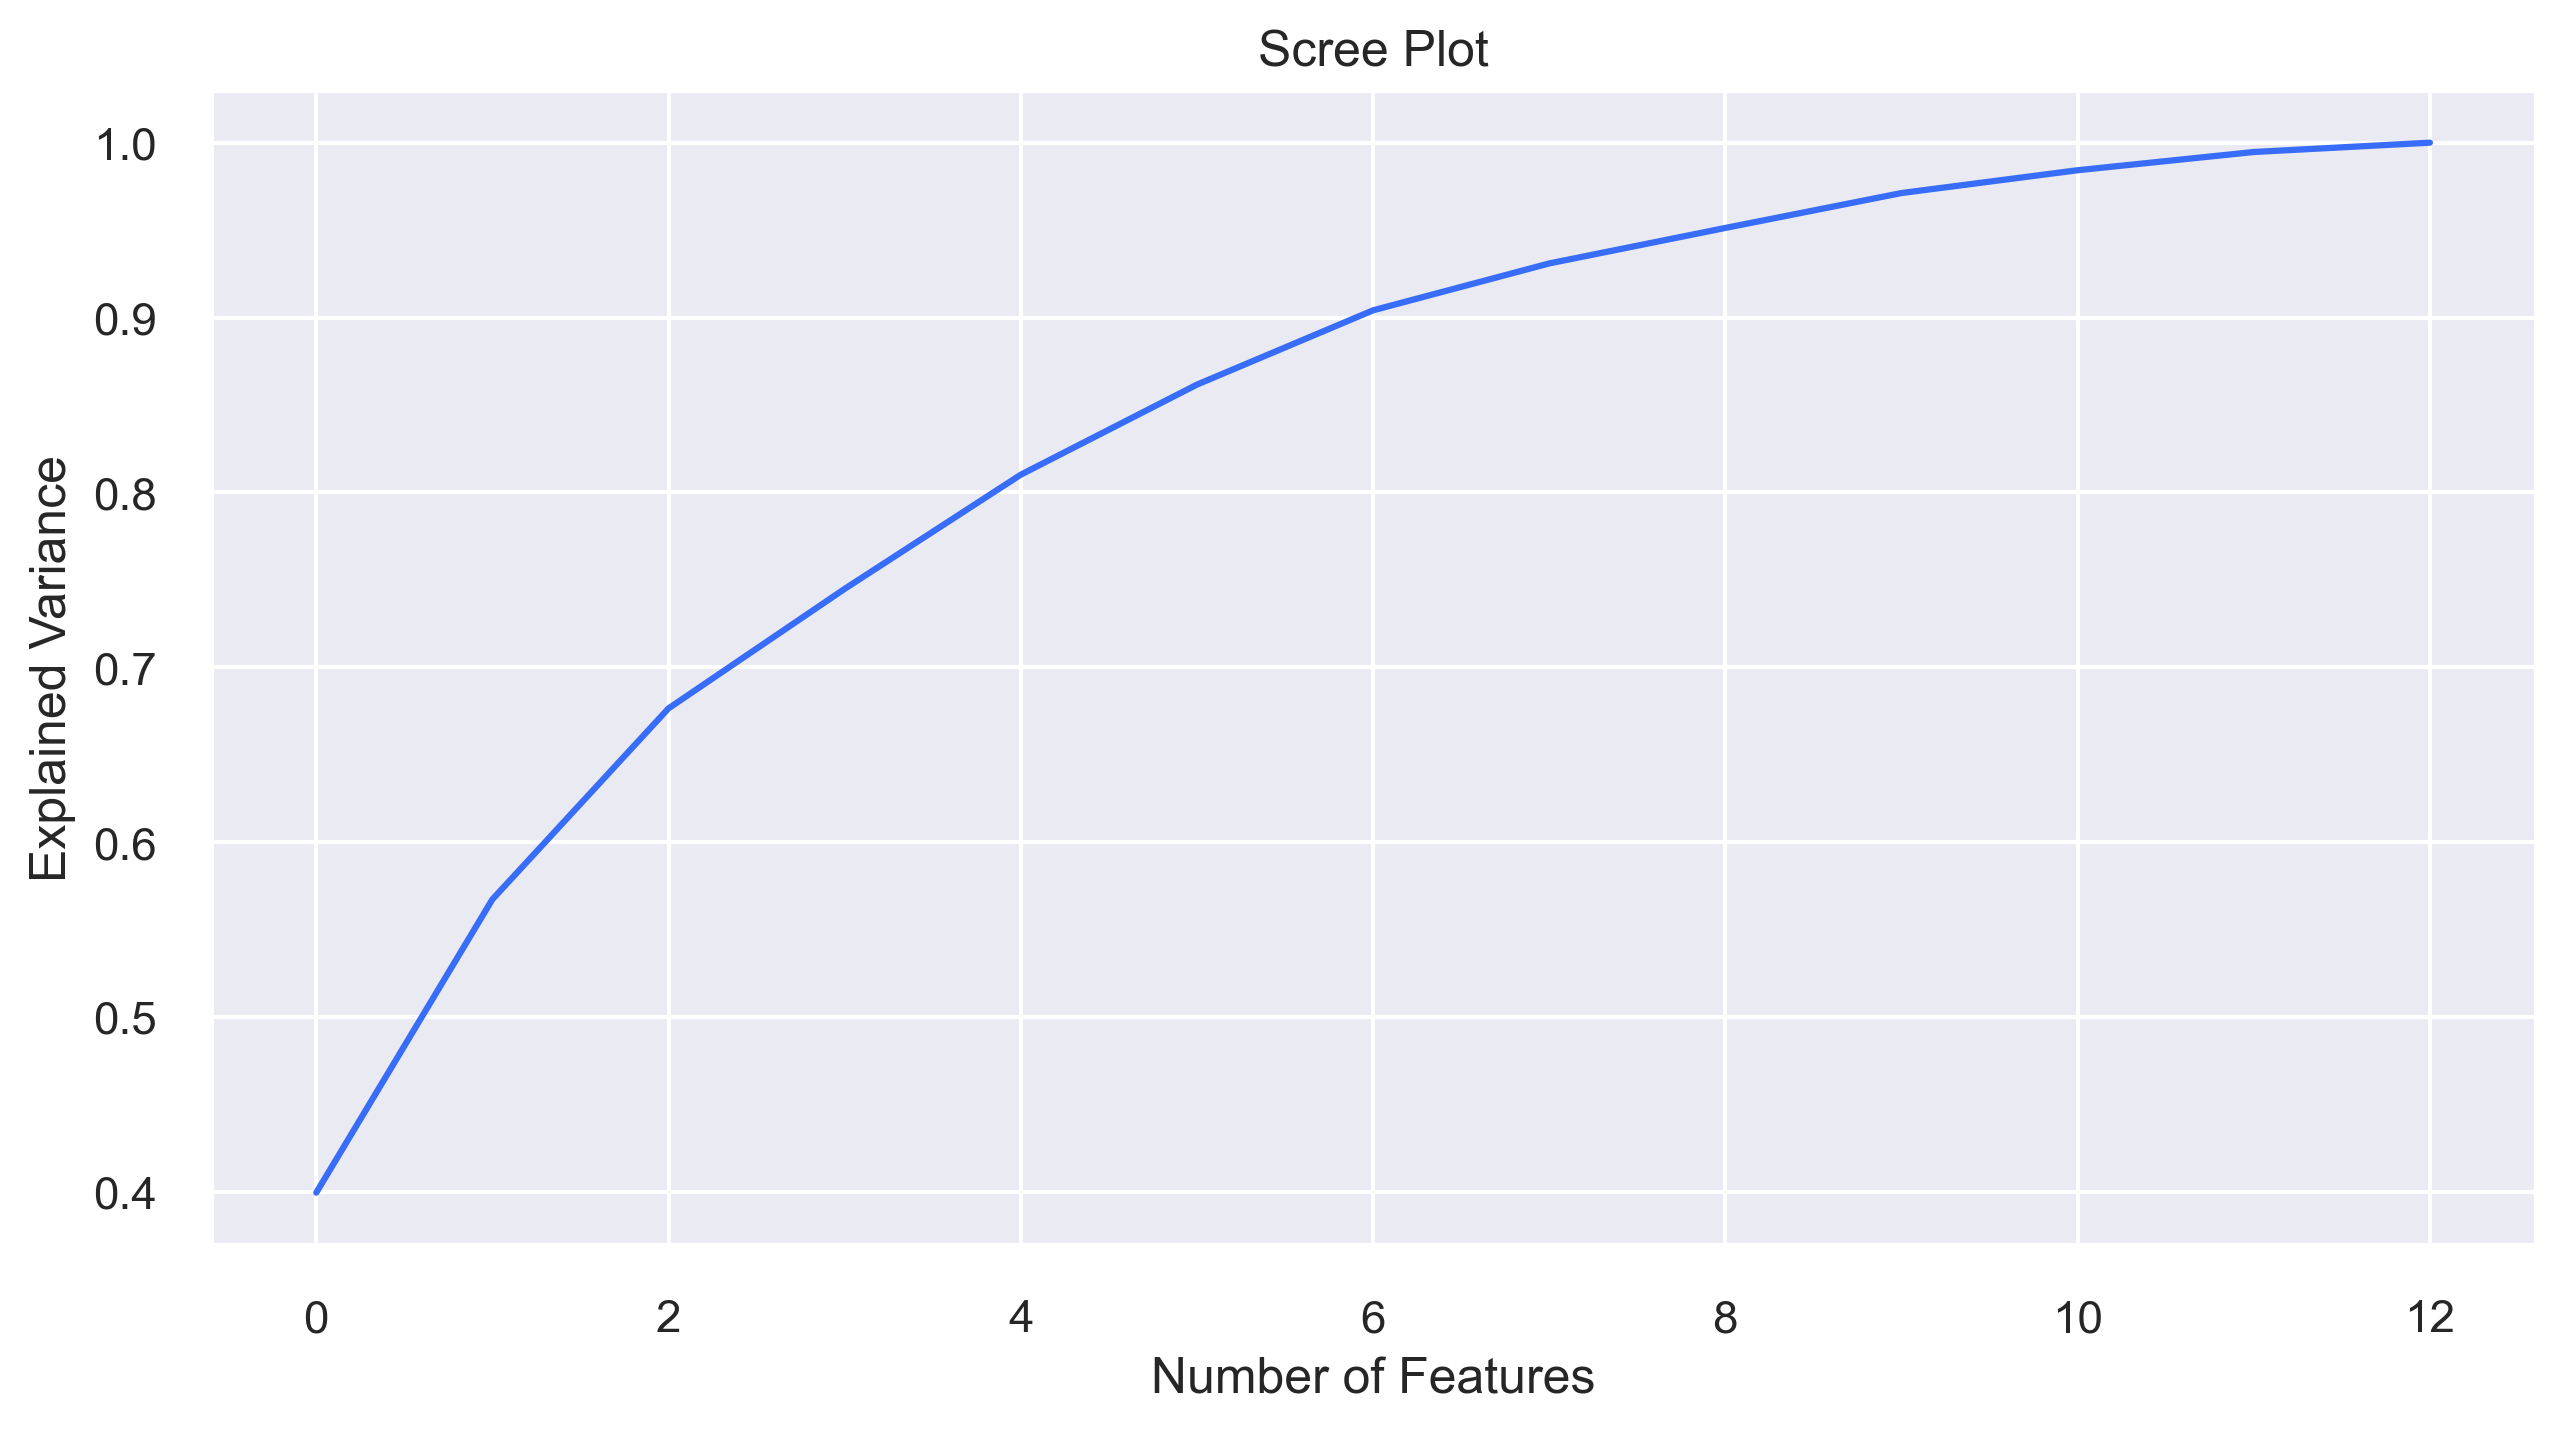

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Features")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")

In [24]:
pca=PCA(n_components=3)
pcs = pca.fit_transform(scaled)
pcs = pd.DataFrame(pcs,columns=['pc1','pc2','pc3'])
pcs

,pc1,pc2,pc3
0,-3.260580,1.736054,-0.405701
1,-2.358620,-0.509786,-1.937094
2,-2.453376,1.120704,0.892834
3,-3.253148,2.686416,-0.411249
4,-1.403734,1.320100,1.854434
...,...,...,...
173,3.886054,1.707484,-0.443465
174,3.148970,1.386257,0.127645
175,3.384134,2.255285,-1.133039
176,3.078204,1.791104,-0.639500


# Clustering

##  Hierarical 


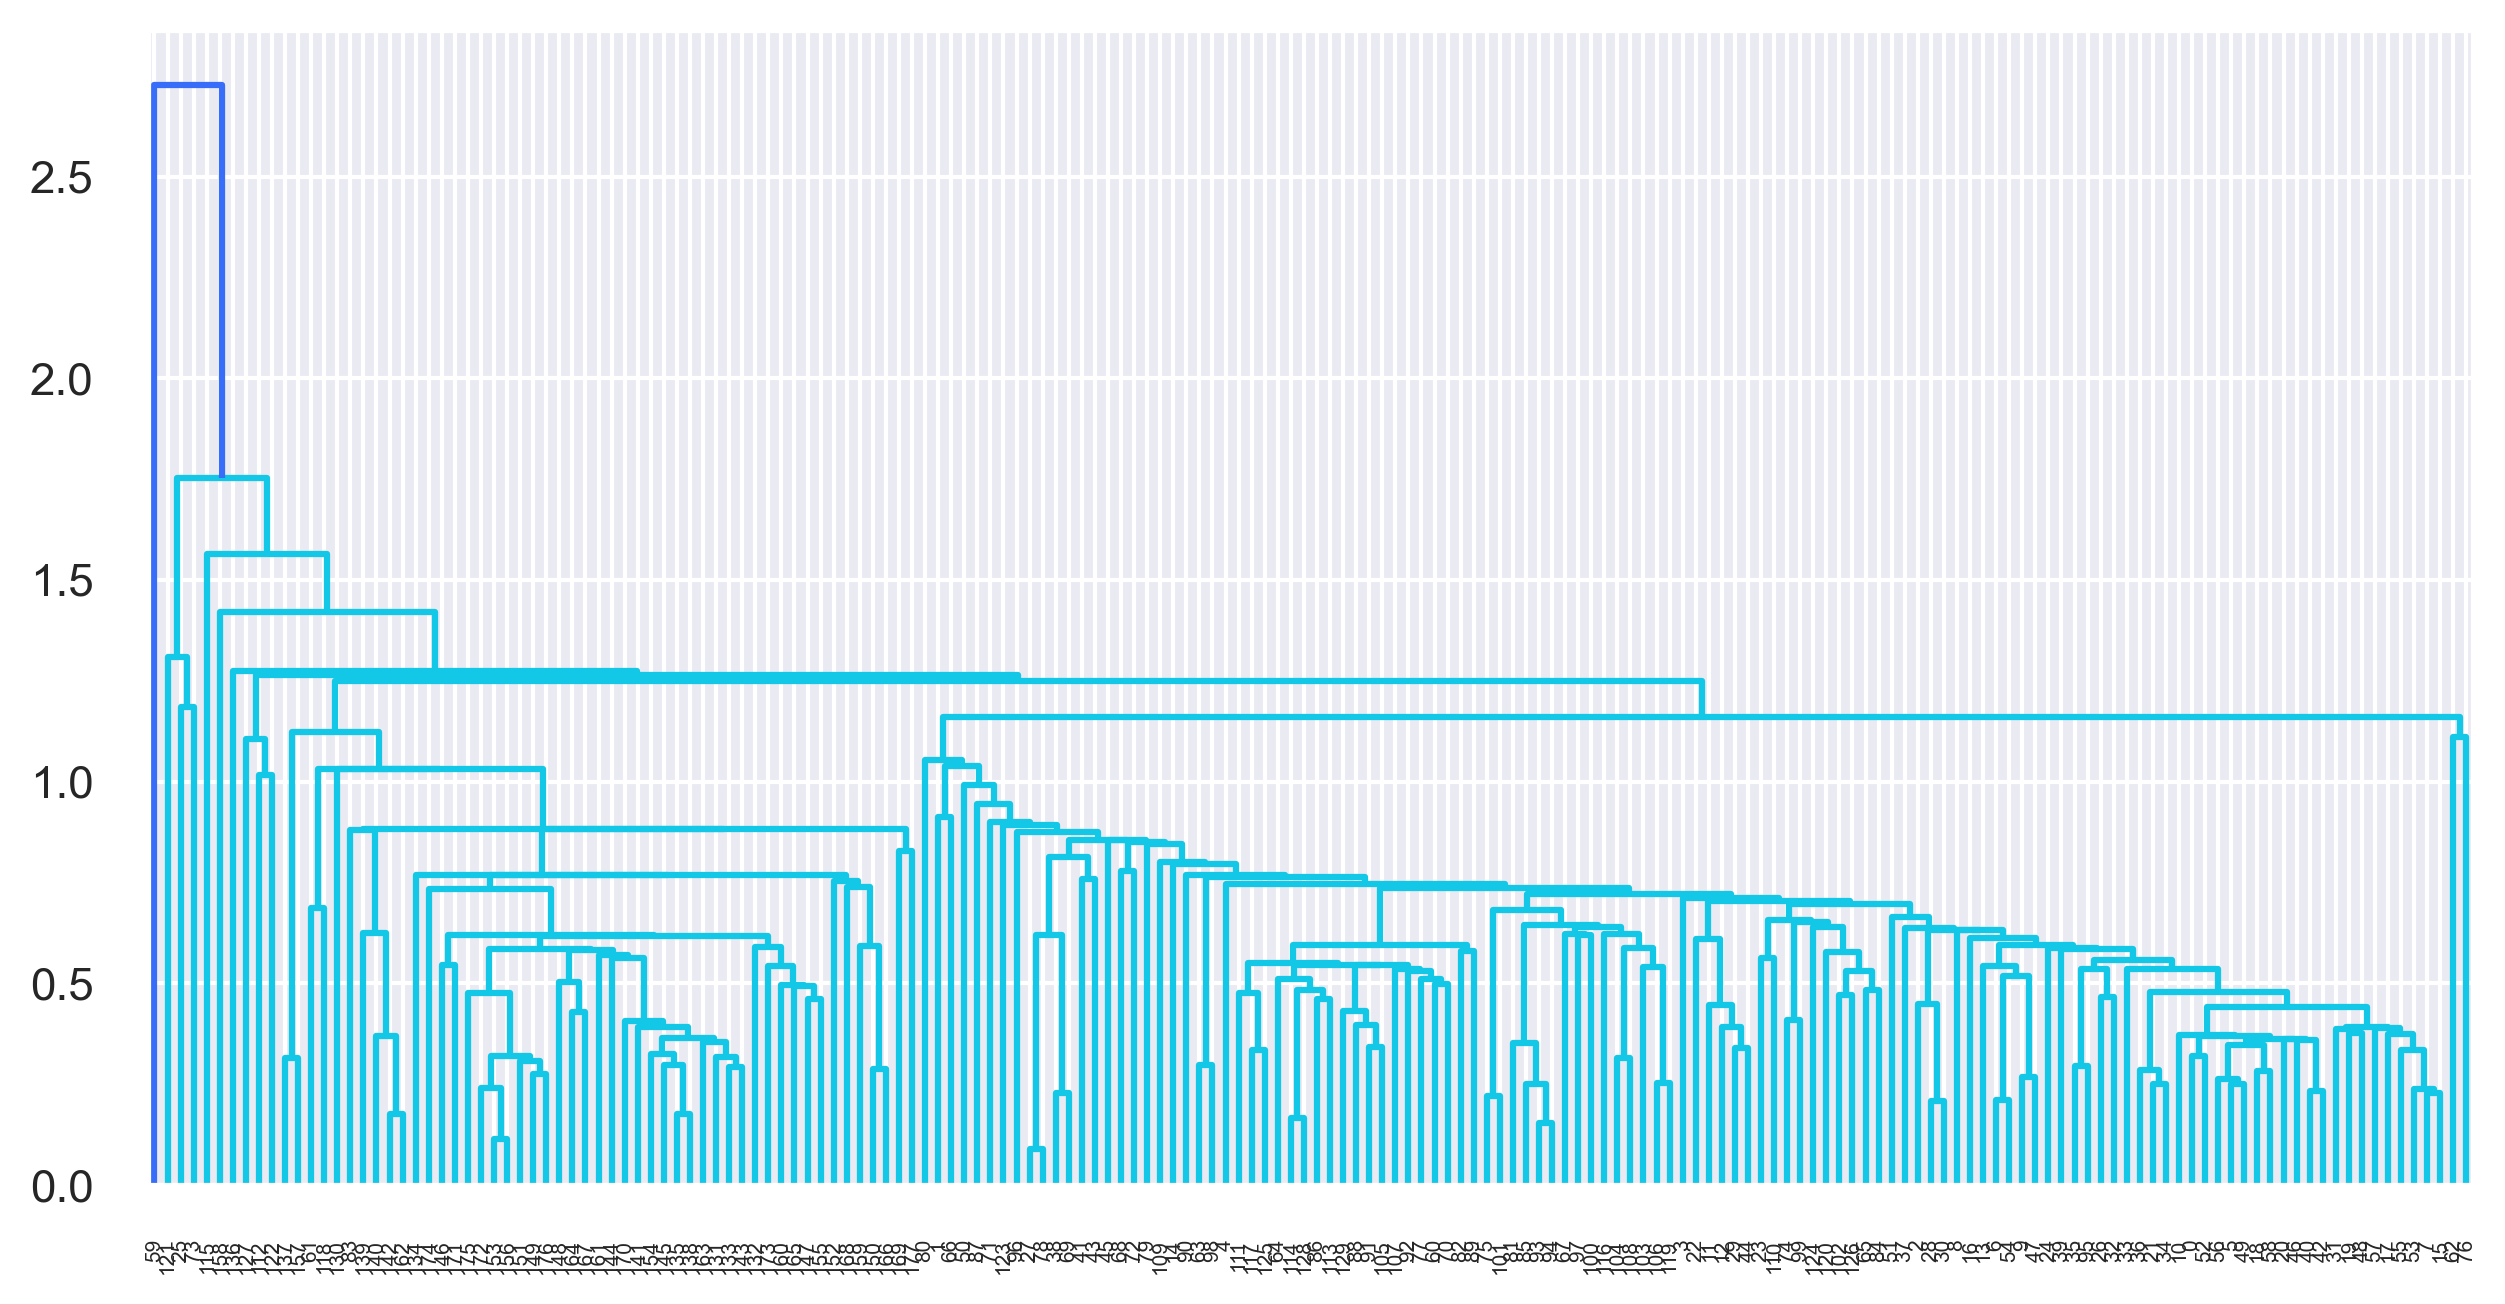

In [25]:
lk = hierarchy.linkage(pcs, method='single')
dend = hierarchy.dendrogram(lk)
plt.show()

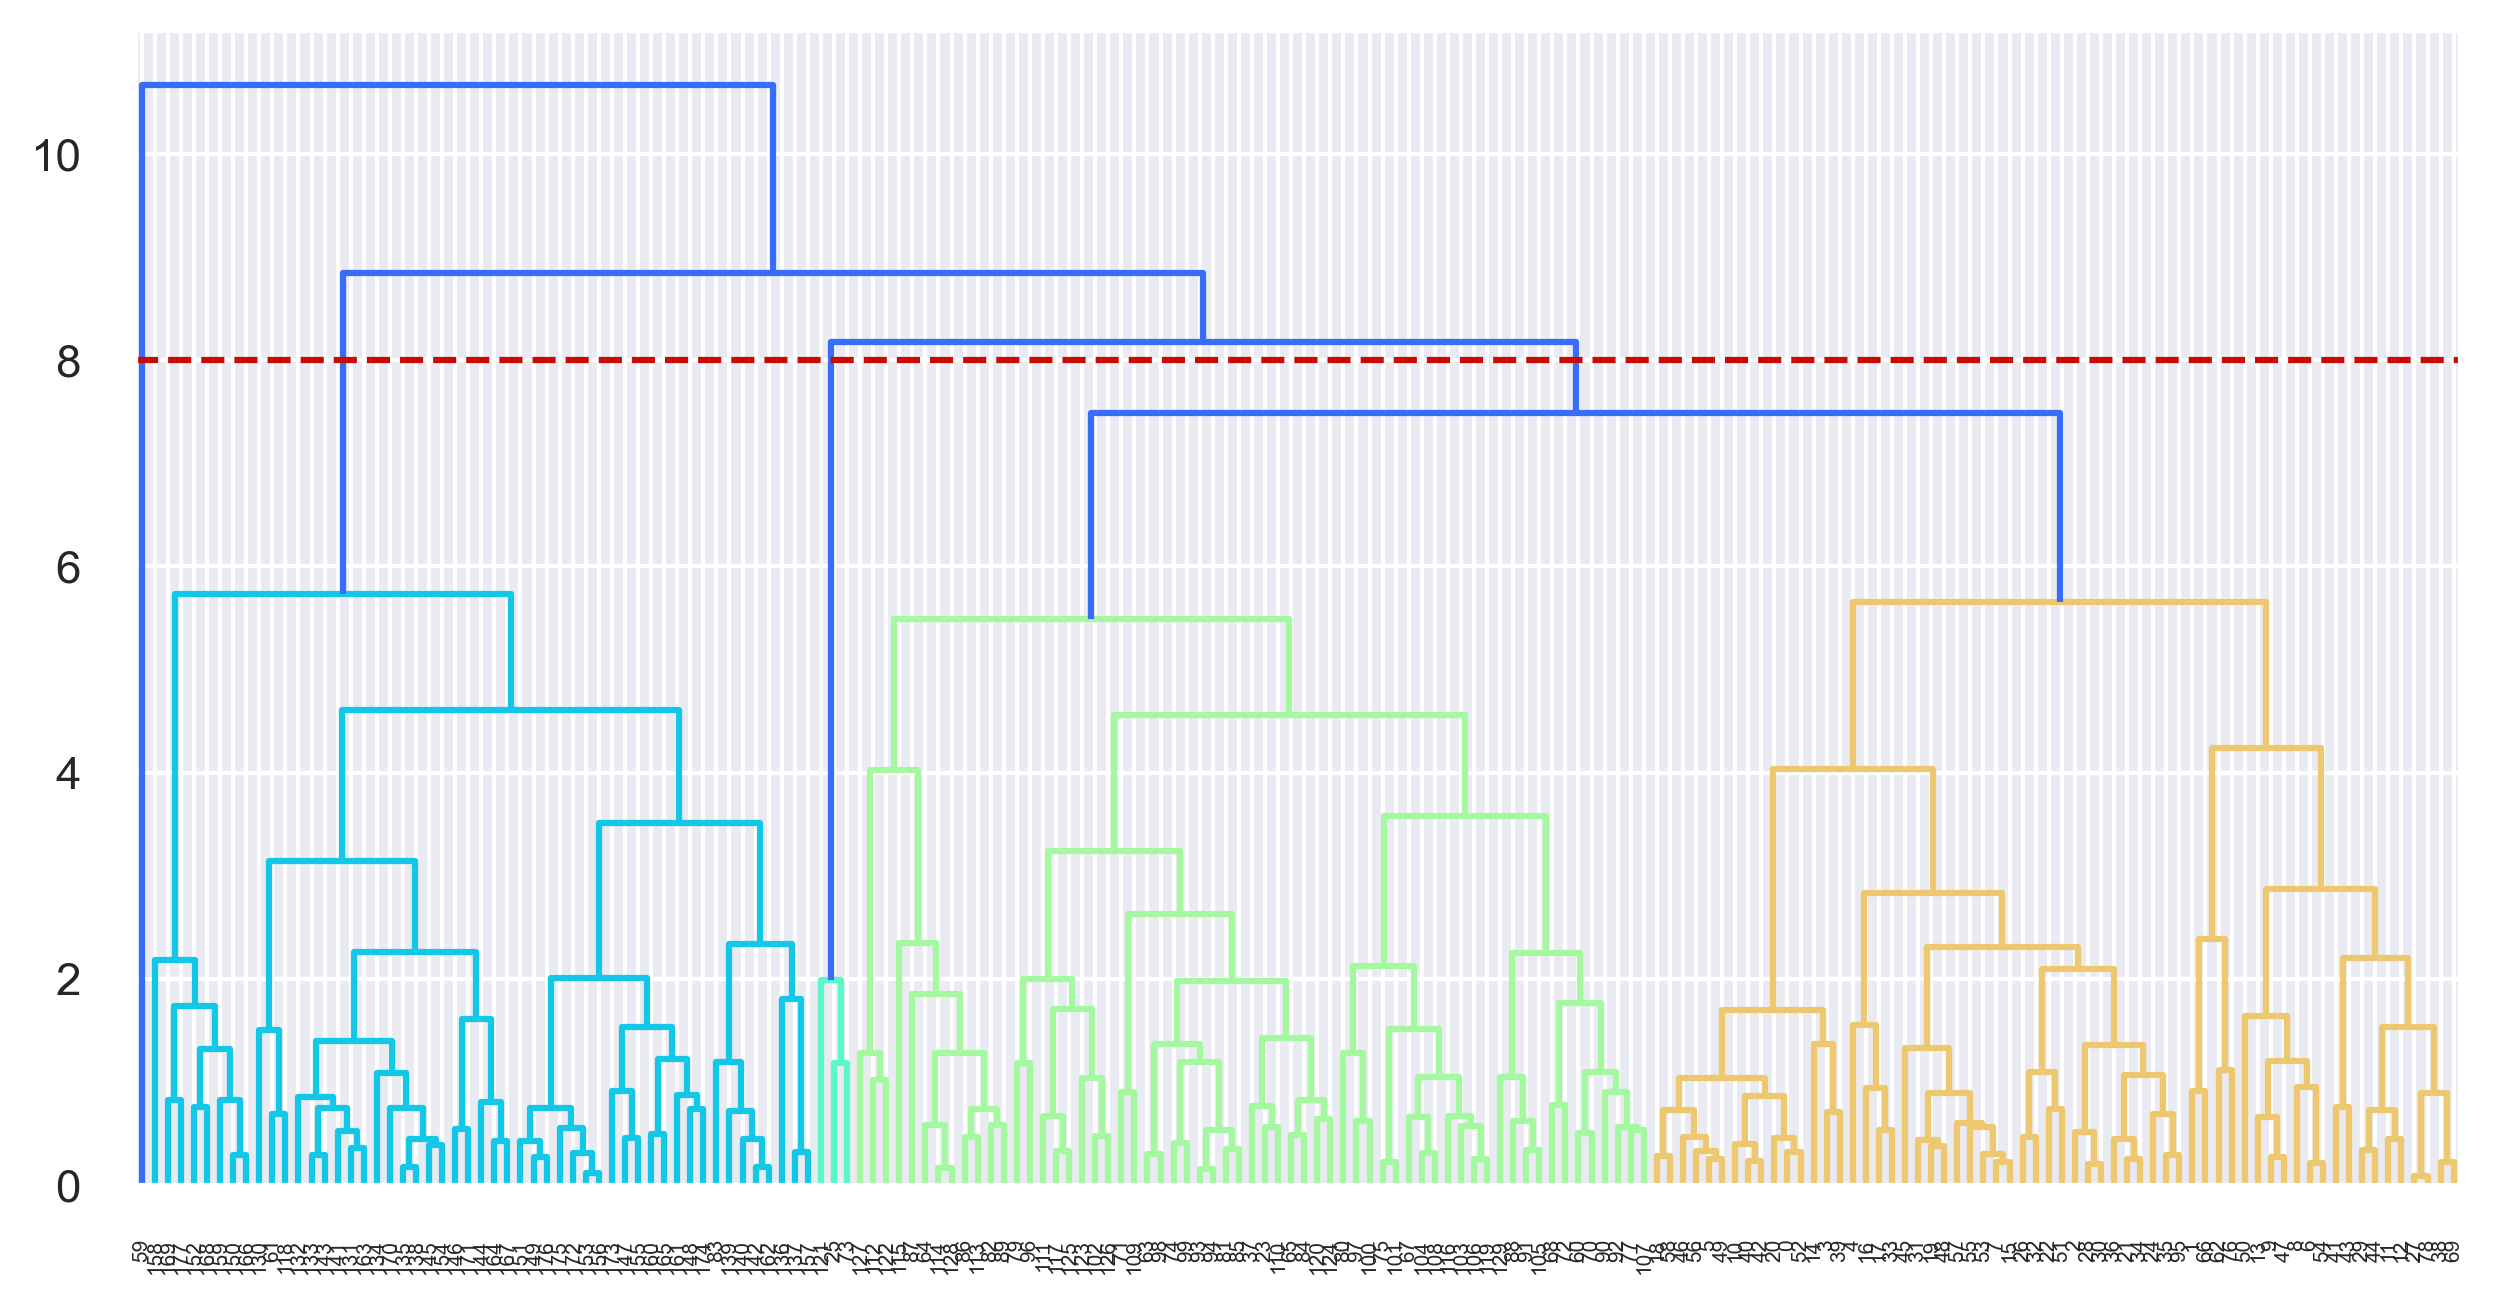

In [26]:
lk_c = hierarchy.linkage(pcs, method='complete')
dend = hierarchy.dendrogram(lk_c)
plt.axhline(8,linestyle='--',c='r')
plt.show()

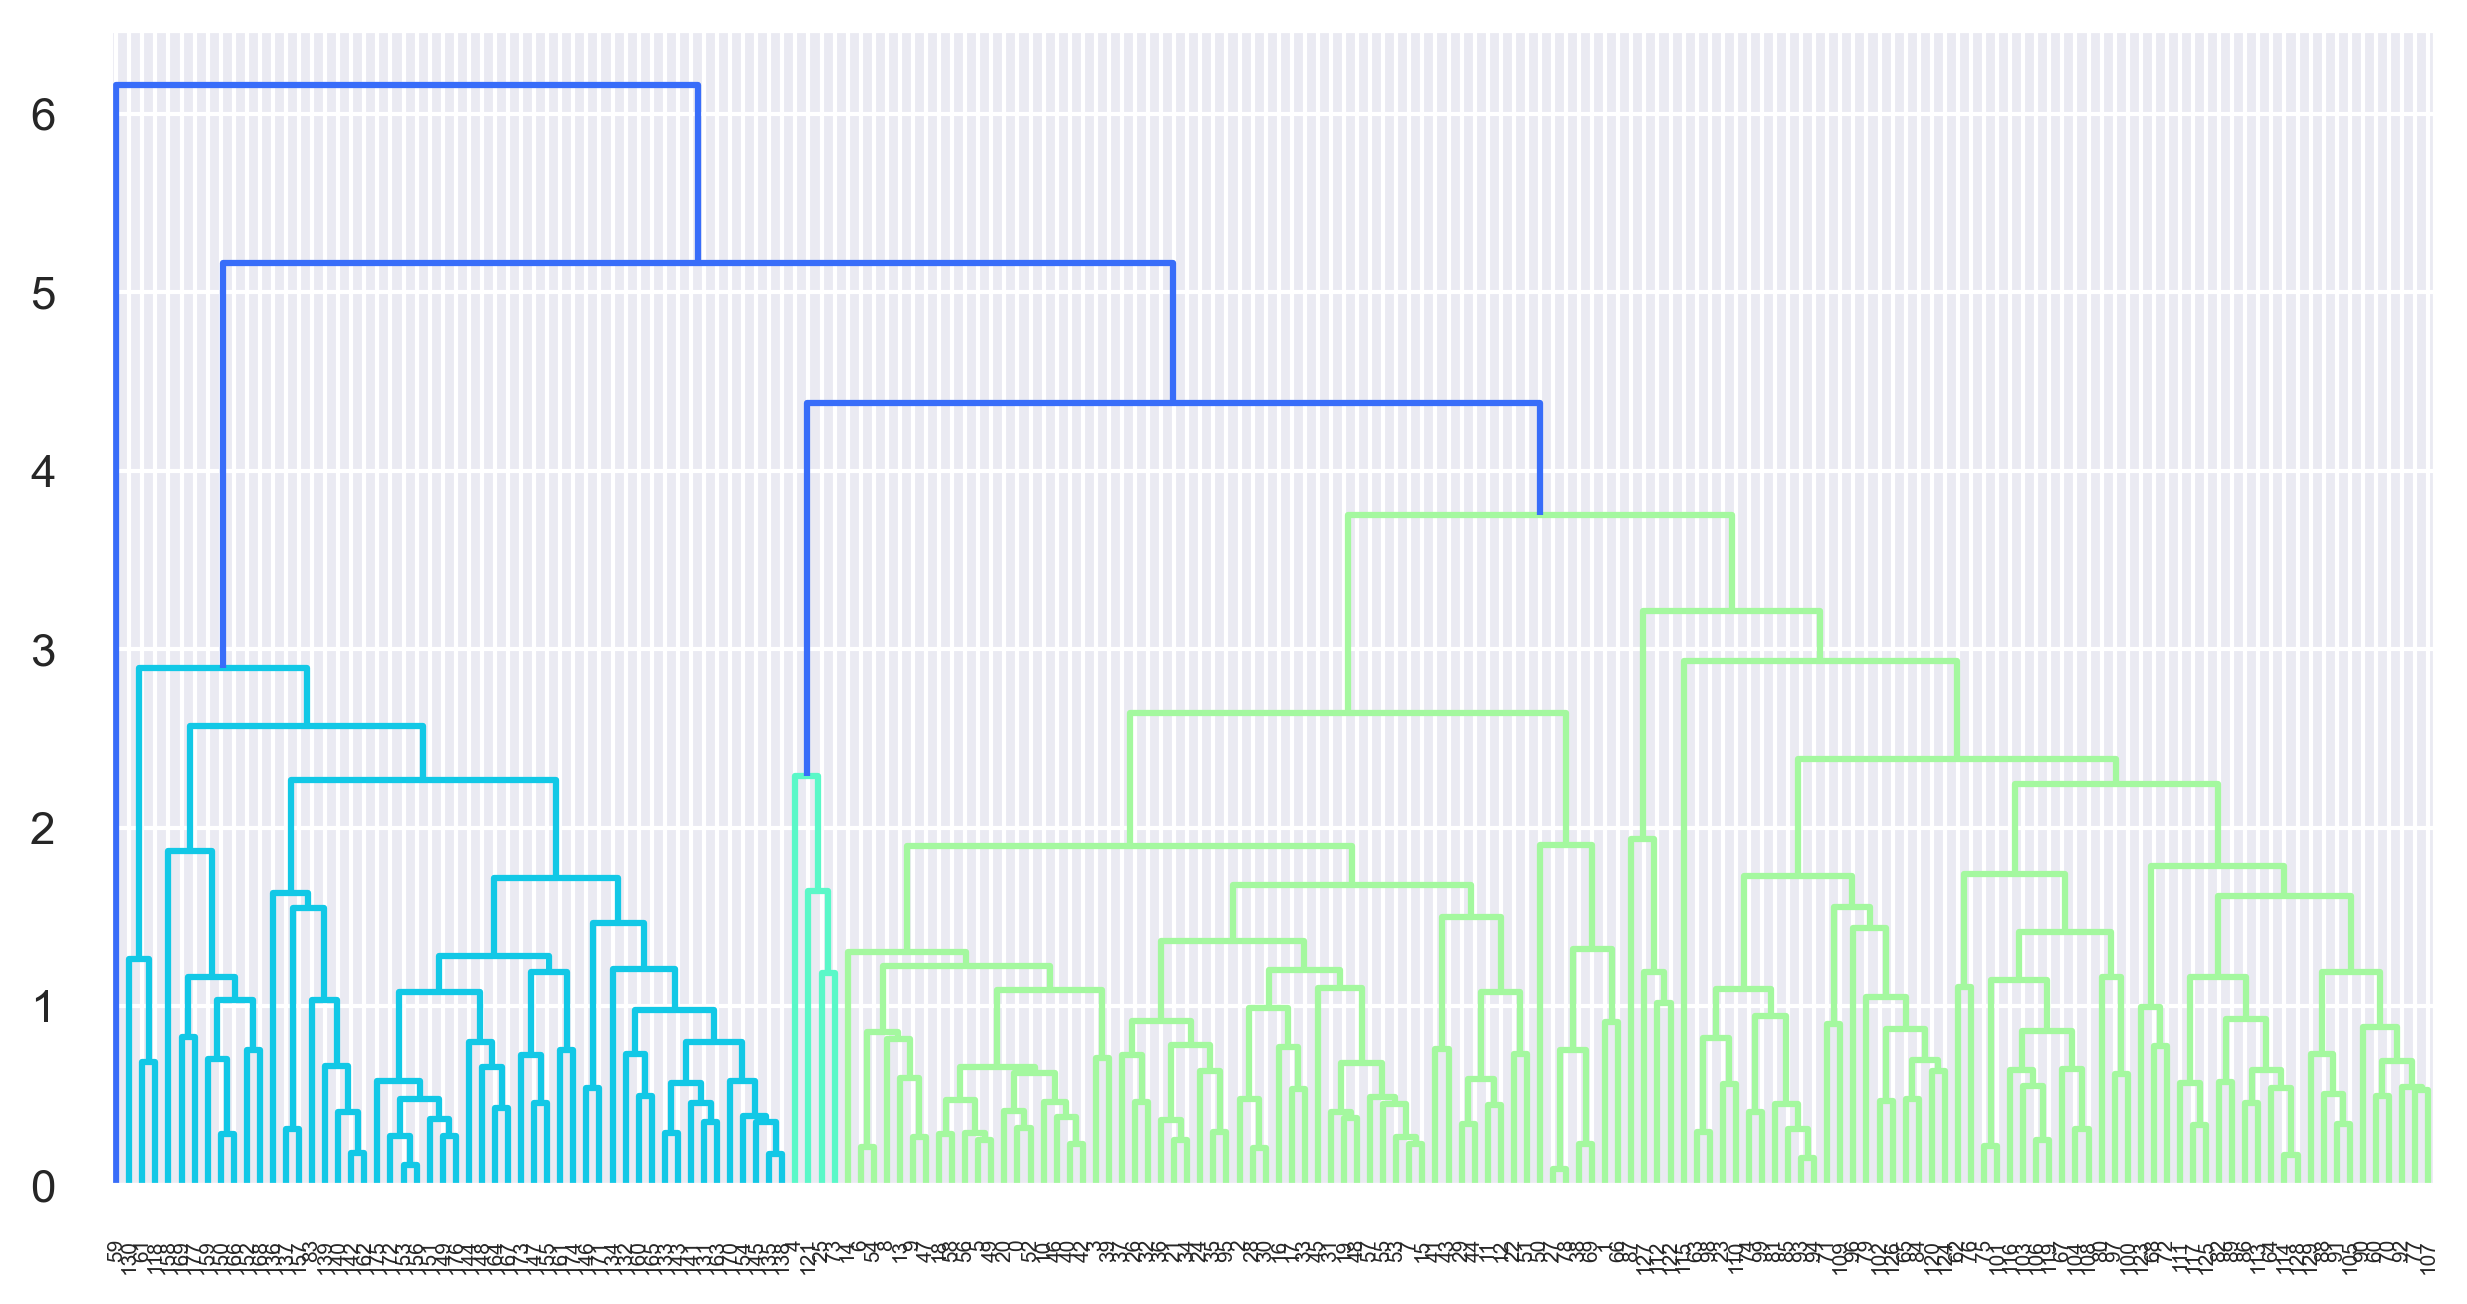

In [27]:
lk_a= hierarchy.linkage(pcs, method='average')
dend = hierarchy.dendrogram(lk_a)
plt.show()

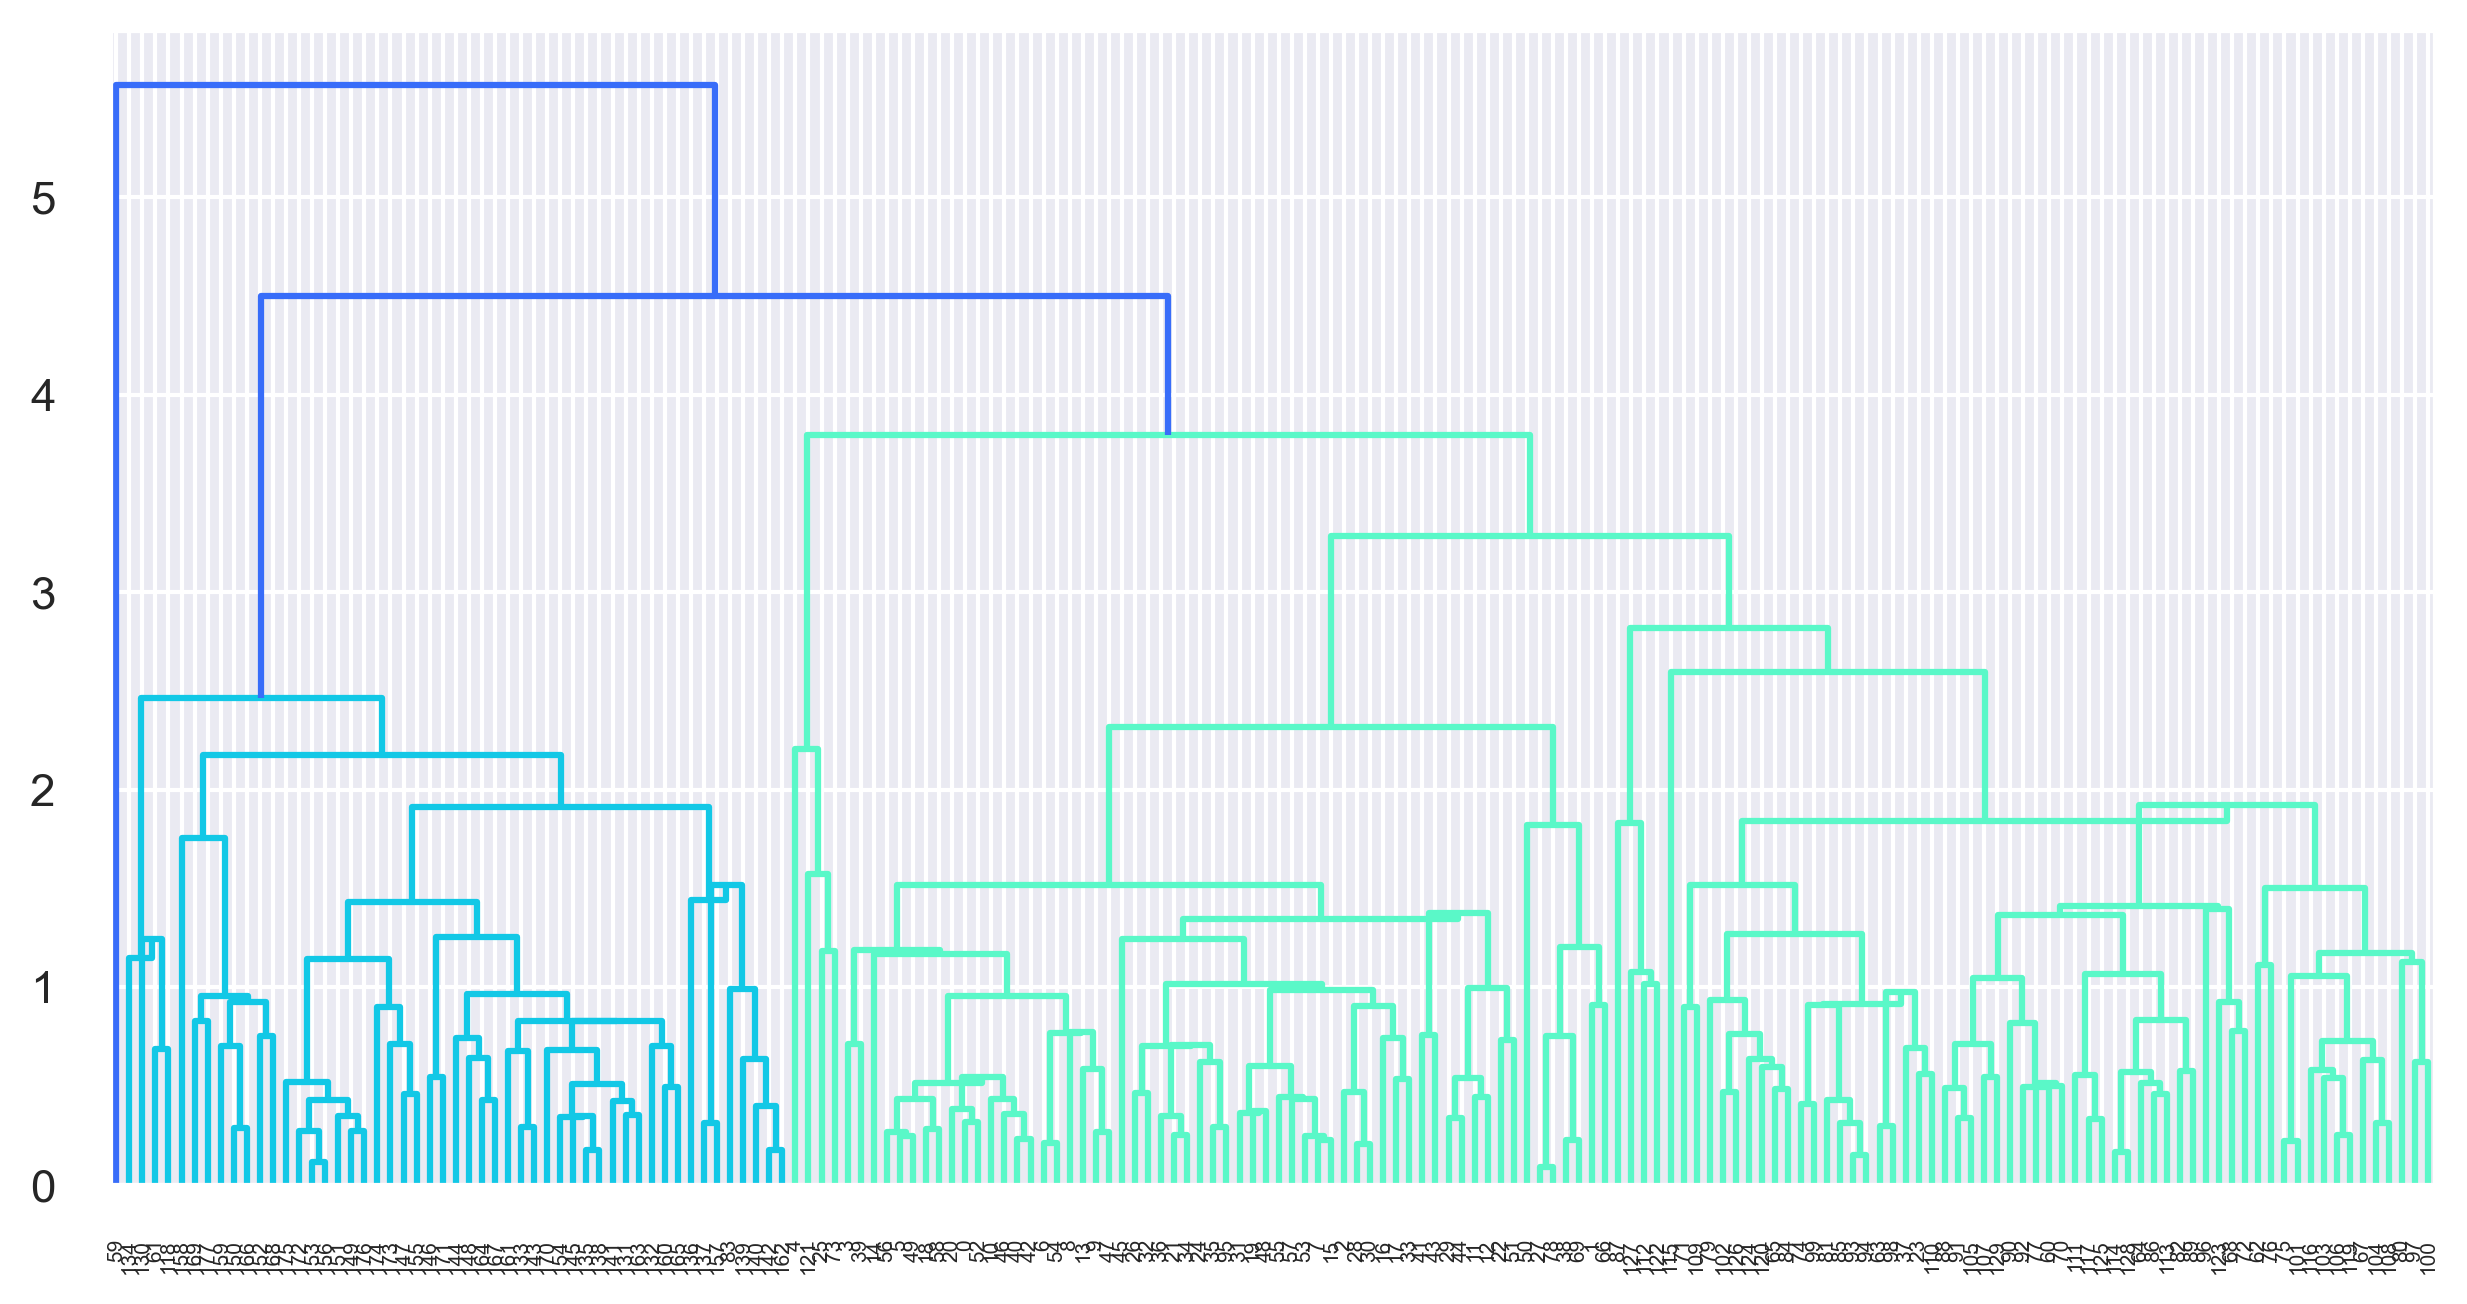

In [28]:
lk_ct = hierarchy.linkage(pcs, method='centroid')
dend = hierarchy.dendrogram(lk_ct)
plt.show()

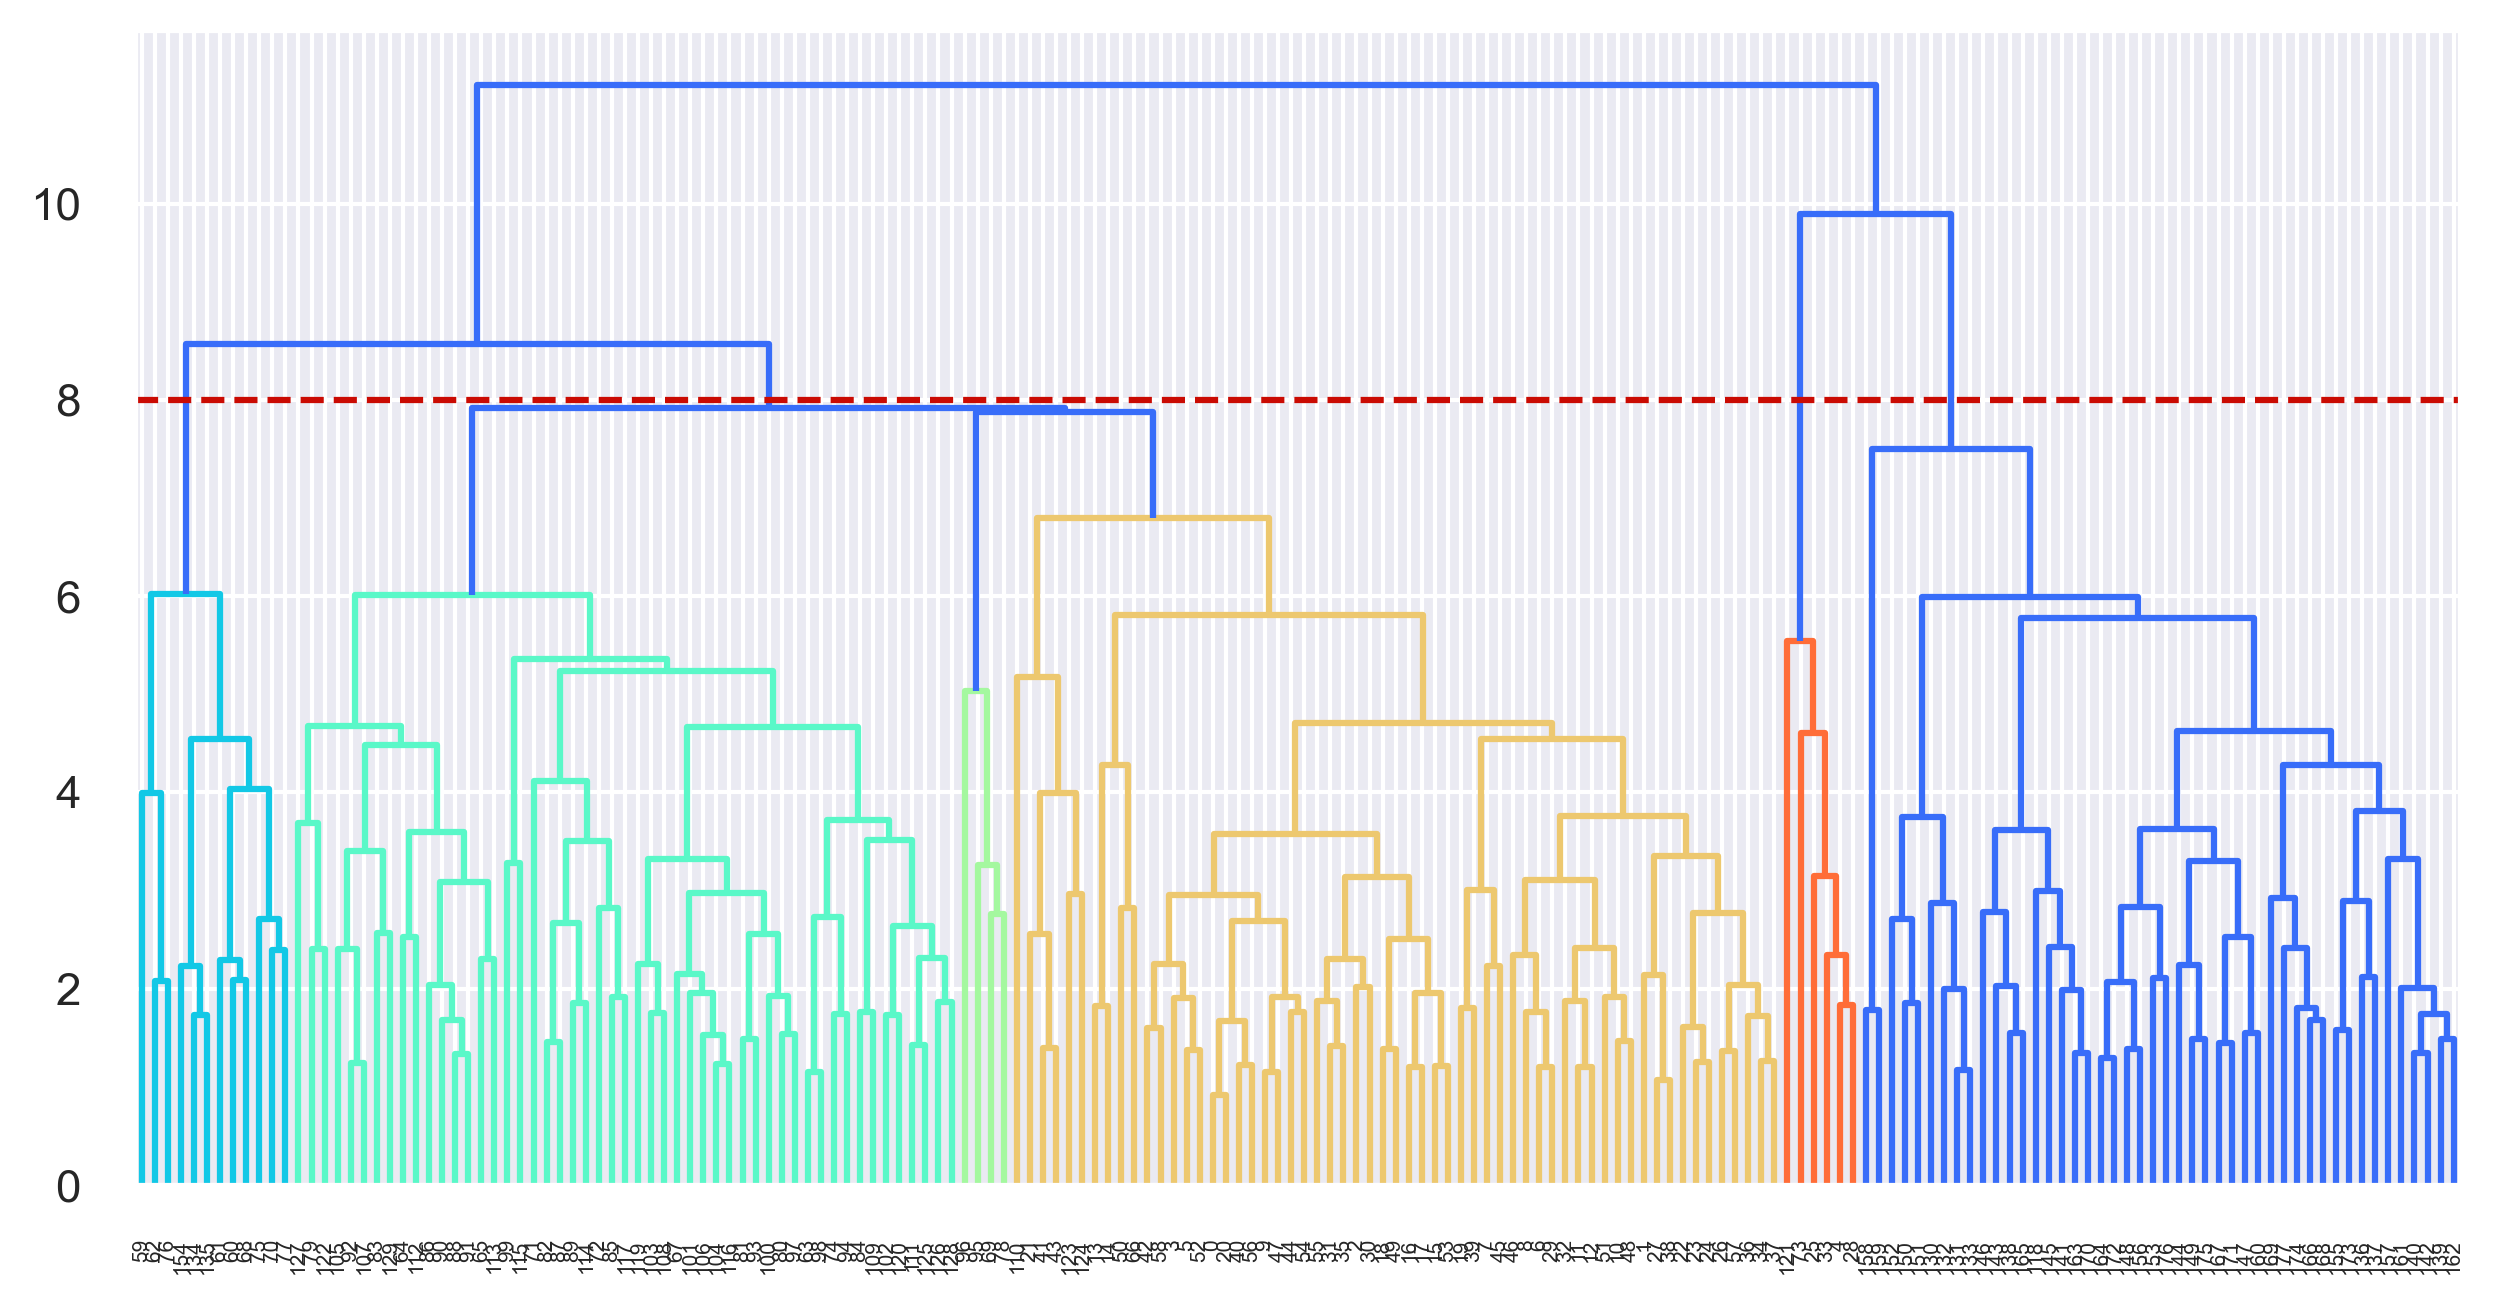

In [51]:
lk_co = hierarchy.linkage(scaled, method='complete')
dend = hierarchy.dendrogram(lk_co)
plt.axhline(8,linestyle='--',c='r')
plt.show()

number of cluster we go here is 4

Since complete linkage gives us better visuals on number of cluster we'll use complete linkage

# Model


In [35]:
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(pcs)

In [36]:
silhouette_score(pcs,y)

0.36640365194427915

In [37]:
pcs['cluster_h']=y

In [38]:
pcs.groupby('cluster_h').agg('mean',numeric_only=True)

,pc1,pc2,pc3
cluster_h,,,
0,-2.369595,1.054928,-0.055289
1,3.082463,0.817150,-0.284574
2,-0.823710,-1.308162,-0.215200
3,0.597130,-1.717531,1.093951


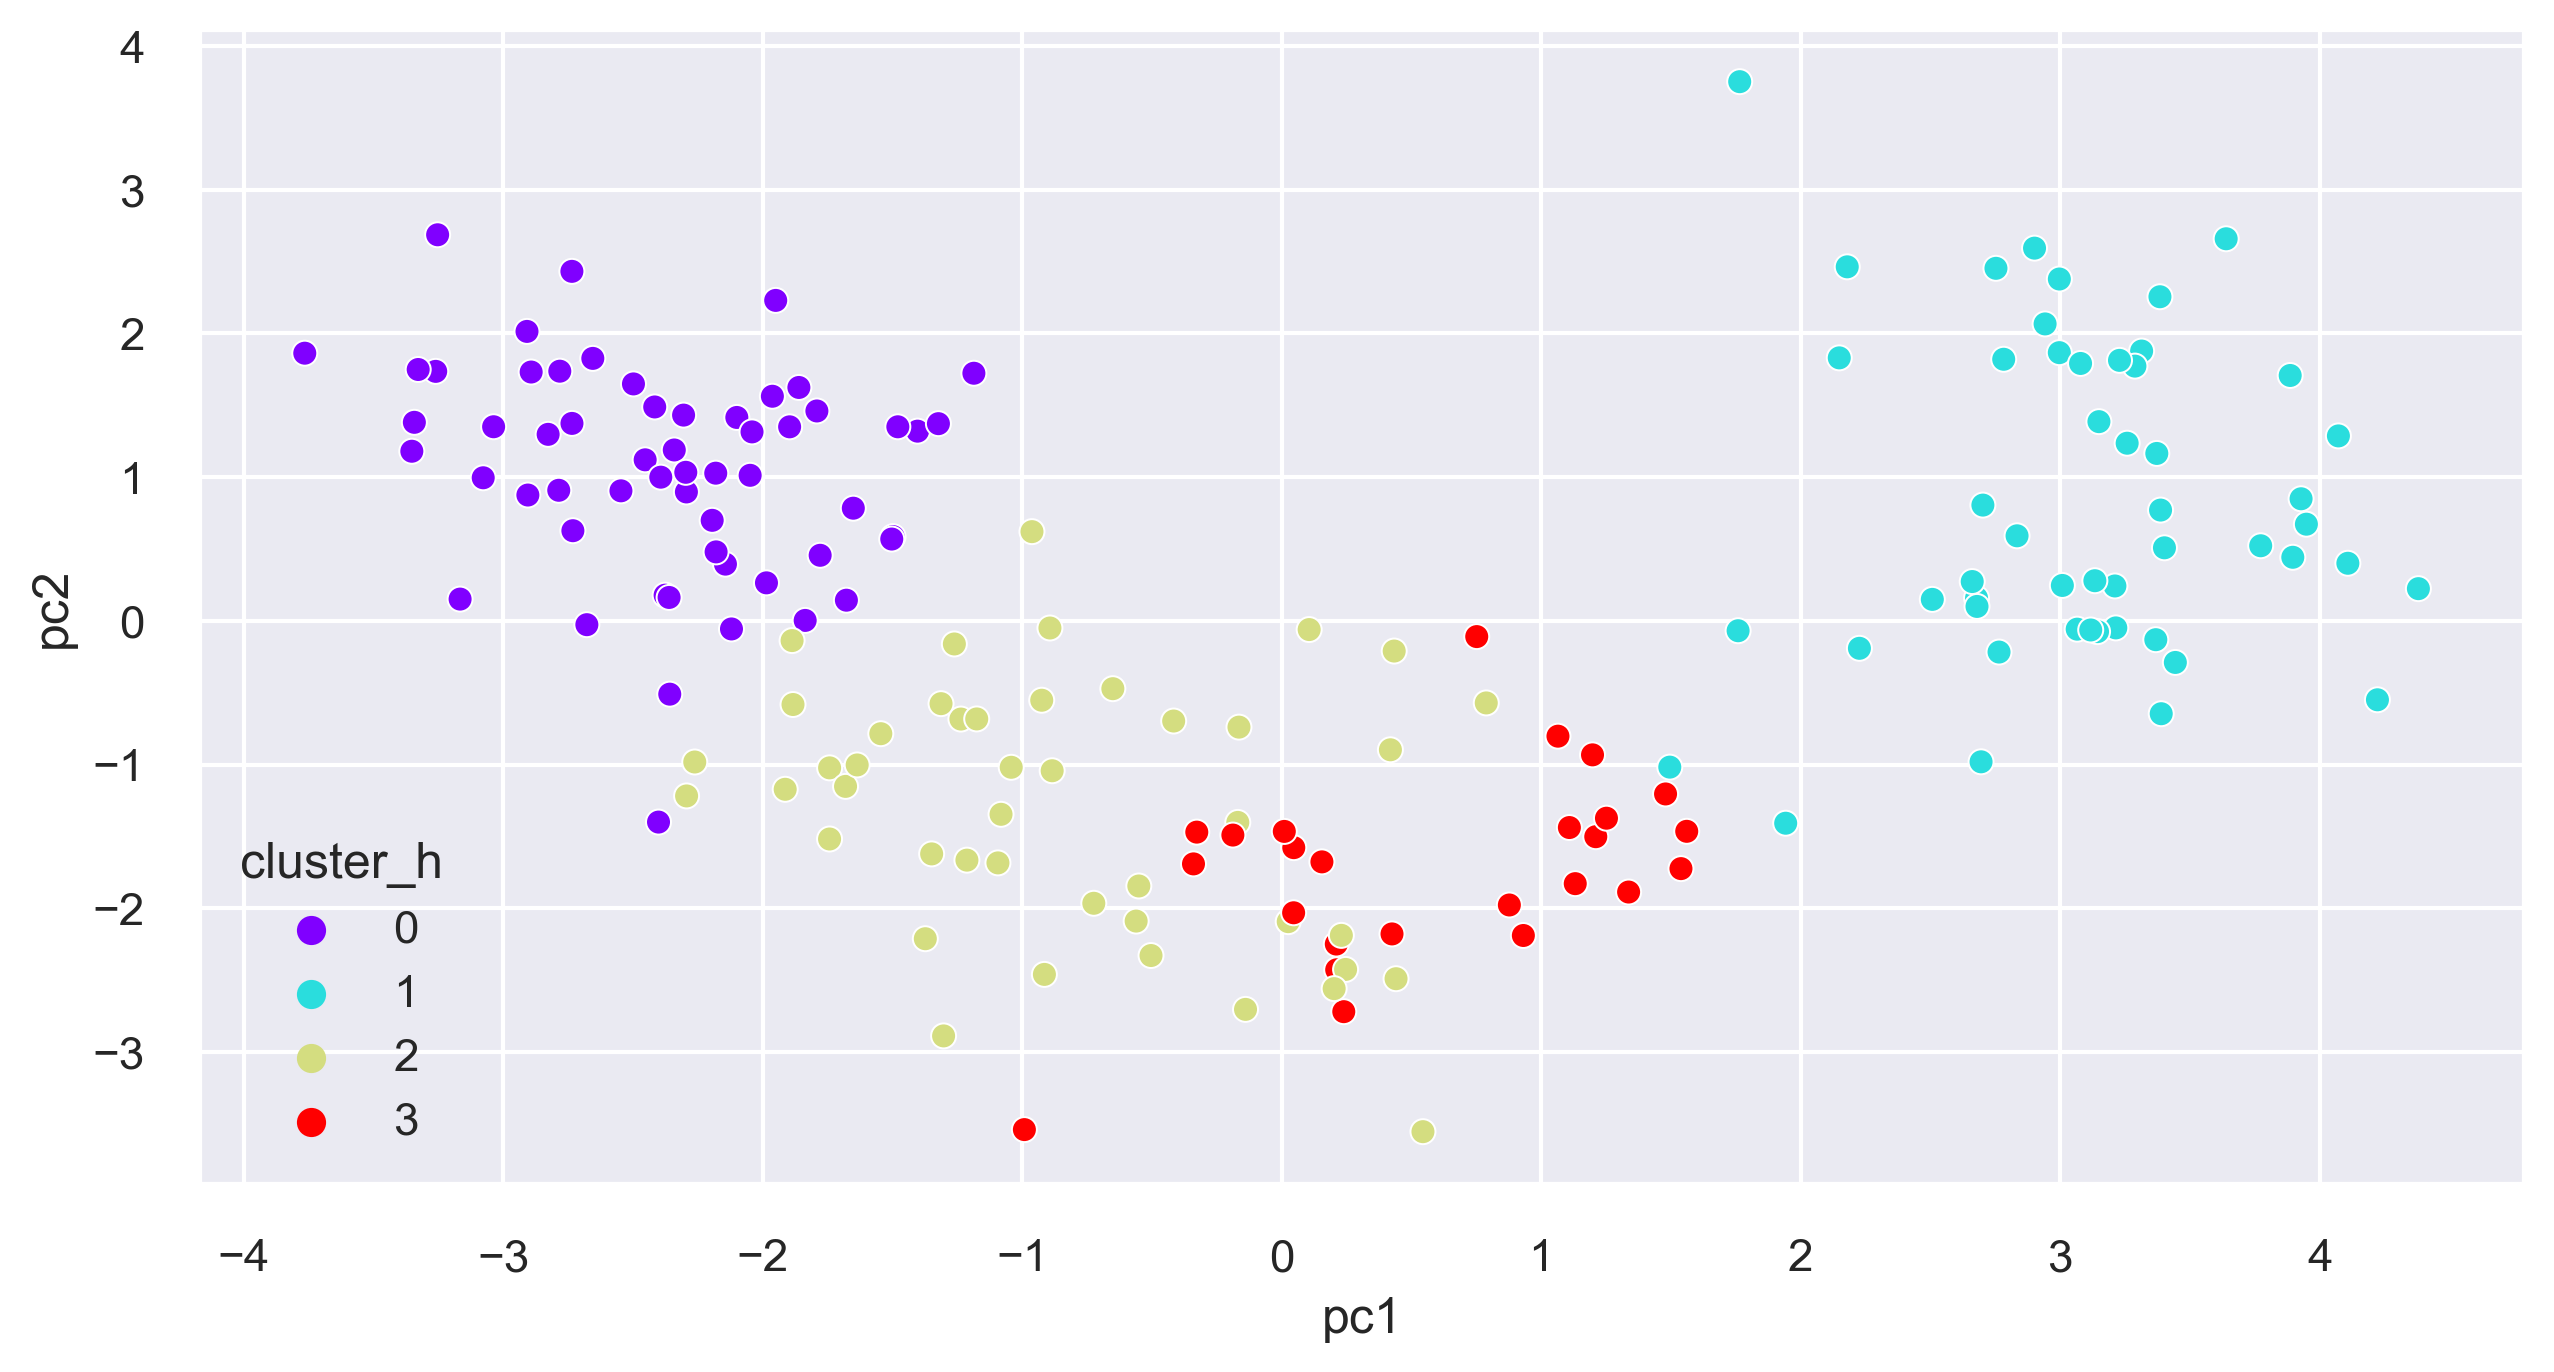

In [39]:
sns.scatterplot(x=pcs['pc1'],y= pcs['pc2'], hue = pcs['cluster_h'],palette='rainbow')
plt.show()

## Kmeans

In [40]:
km = KMeans()
y = km.fit_predict(pcs)

In [41]:
km.cluster_centers_

array([[-3.03715185e-01, -2.34639105e+00, -1.07790881e+00,
         2.00000000e+00],
       [-2.73471884e+00,  1.06614243e+00, -9.08715484e-01,
         2.22044605e-16],
       [ 3.04638796e+00,  5.31156333e-02, -5.09616130e-01,
         1.00000000e+00],
       [-1.26484878e+00, -8.14597341e-01,  2.04734019e-01,
         2.00000000e+00],
       [-1.96924382e+00,  1.02861091e+00,  5.61214477e-01,
         6.66133815e-16],
       [ 3.13399922e+00,  1.90862780e+00,  3.69146536e-02,
         1.00000000e+00],
       [-1.66600715e+00,  1.14081059e+00,  4.03691996e+00,
         2.22044605e-16],
       [ 5.91711986e-01, -1.59341275e+00,  1.01091346e+00,
         2.89285714e+00]])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

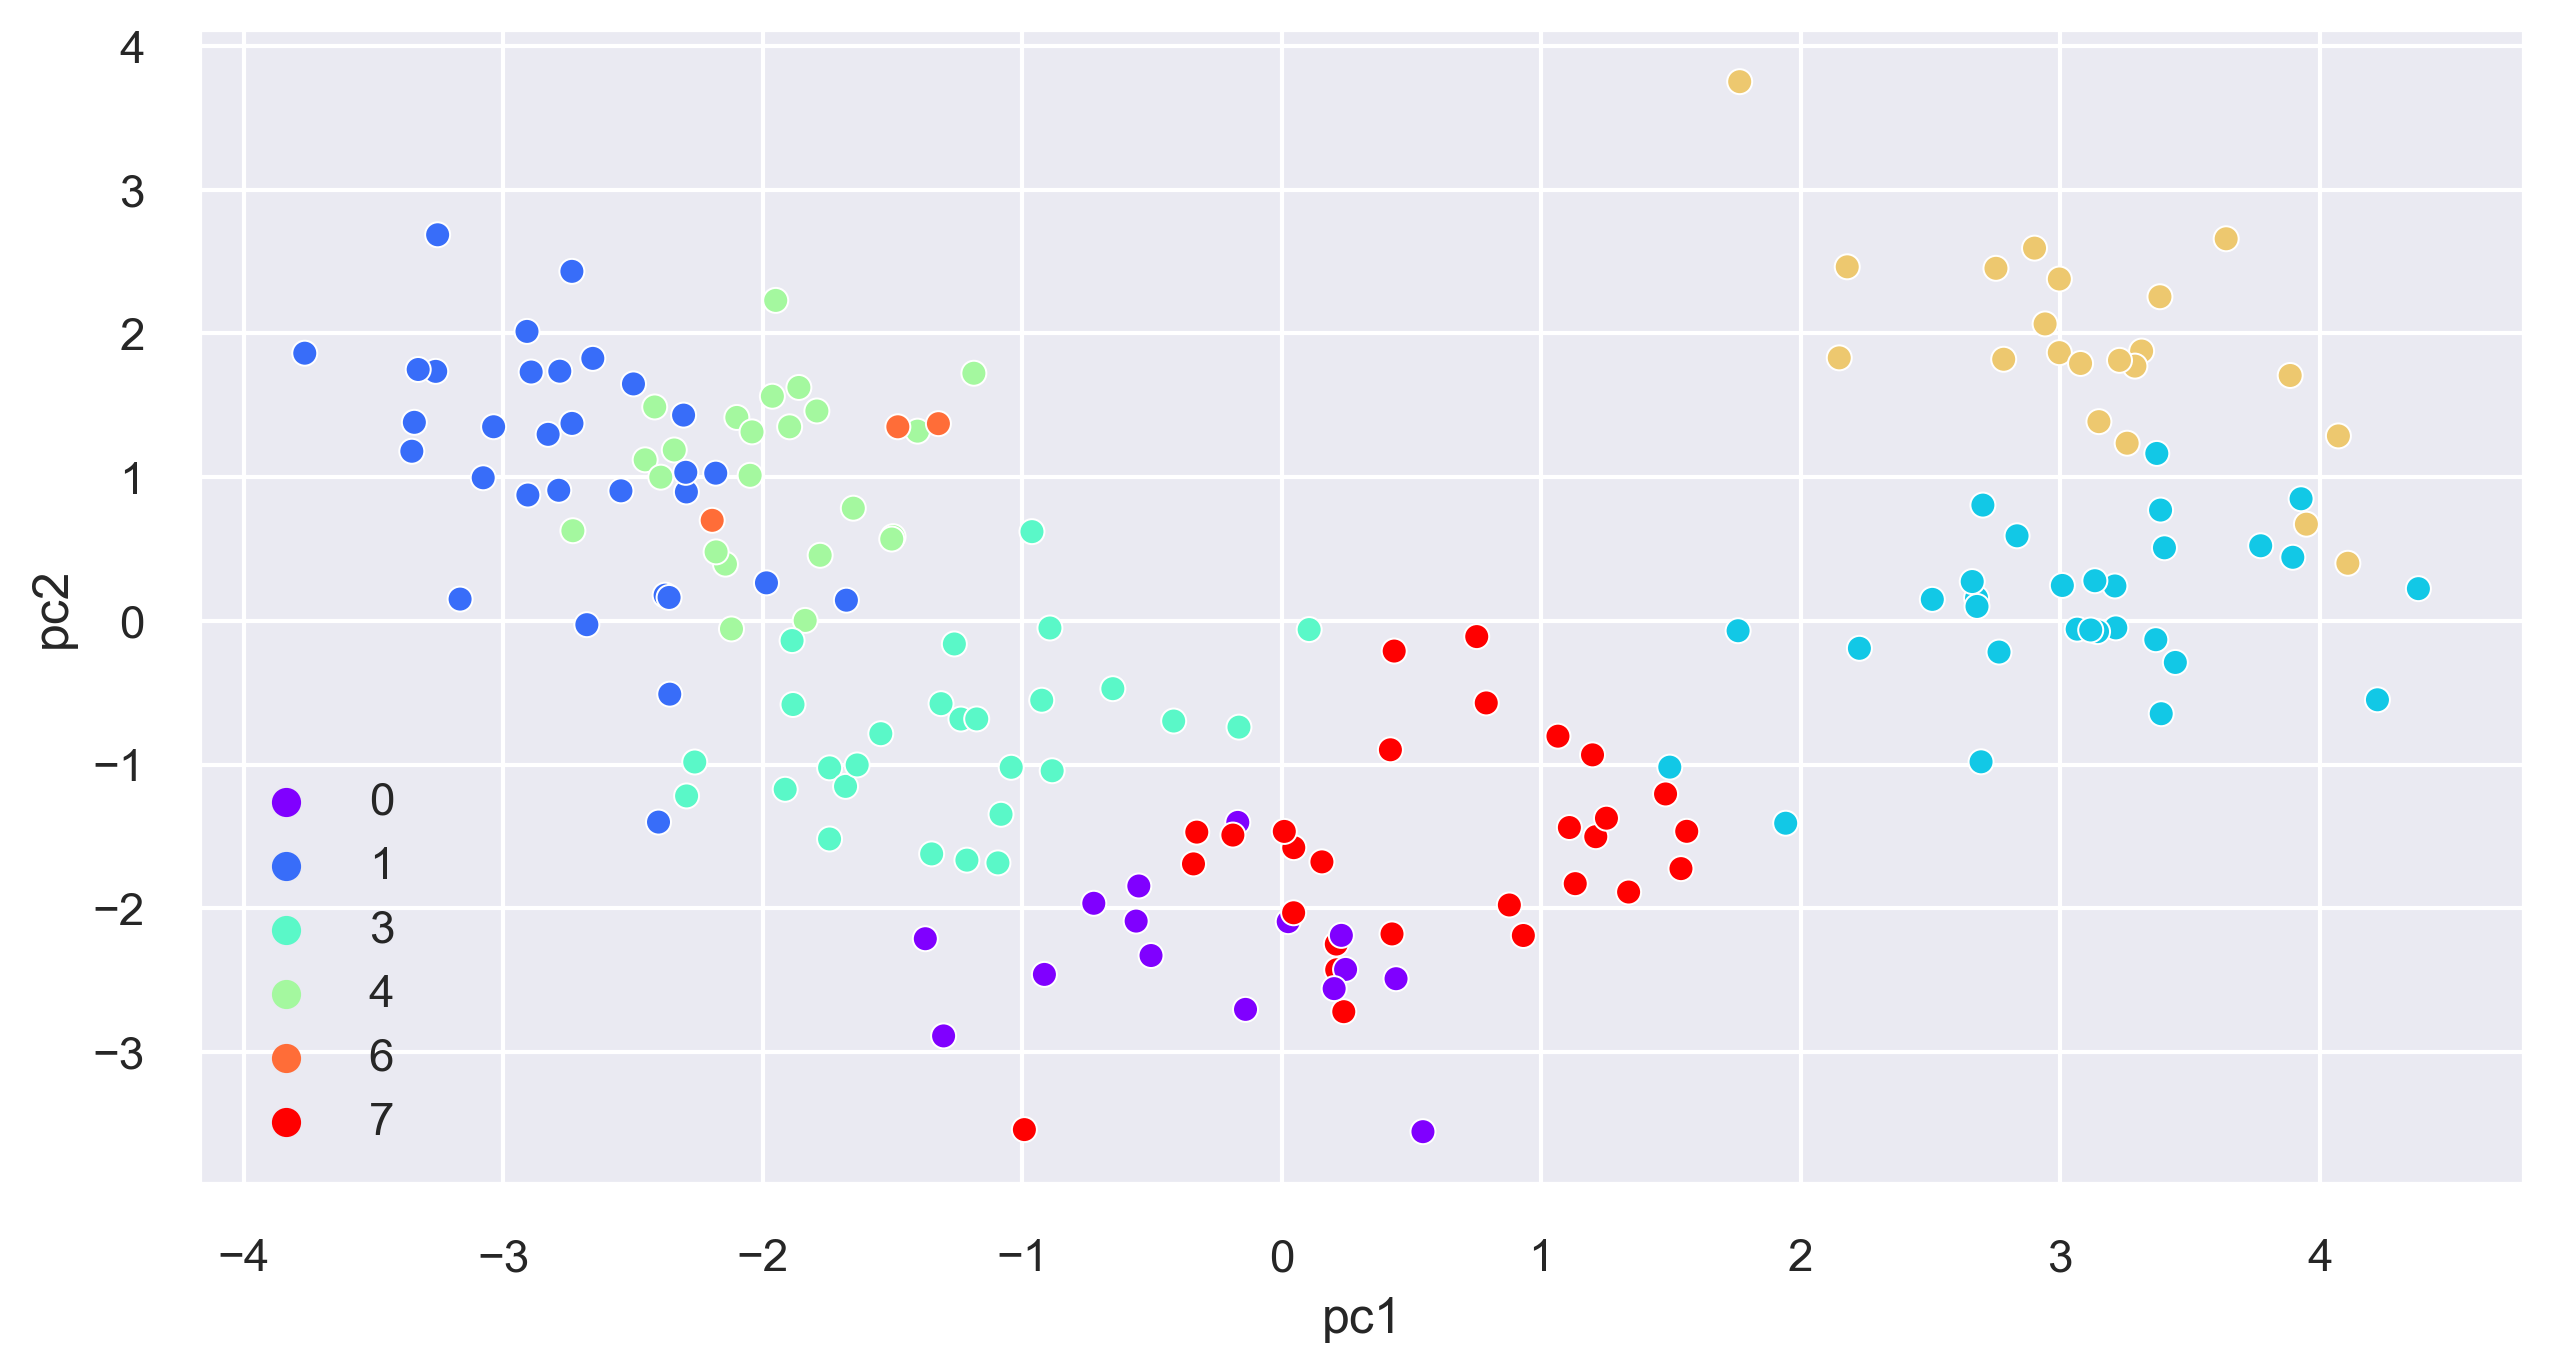

In [42]:
sns.scatterplot(x= pcs['pc1'],y=pcs['pc2'],hue=y,palette='rainbow')

In [43]:
silhouette_score(pcs,y)

0.33836065938539694

# Elbow Graph

In [46]:
# for pcs data
wcss = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(pcs)
    wcss.append(km.inertia_)

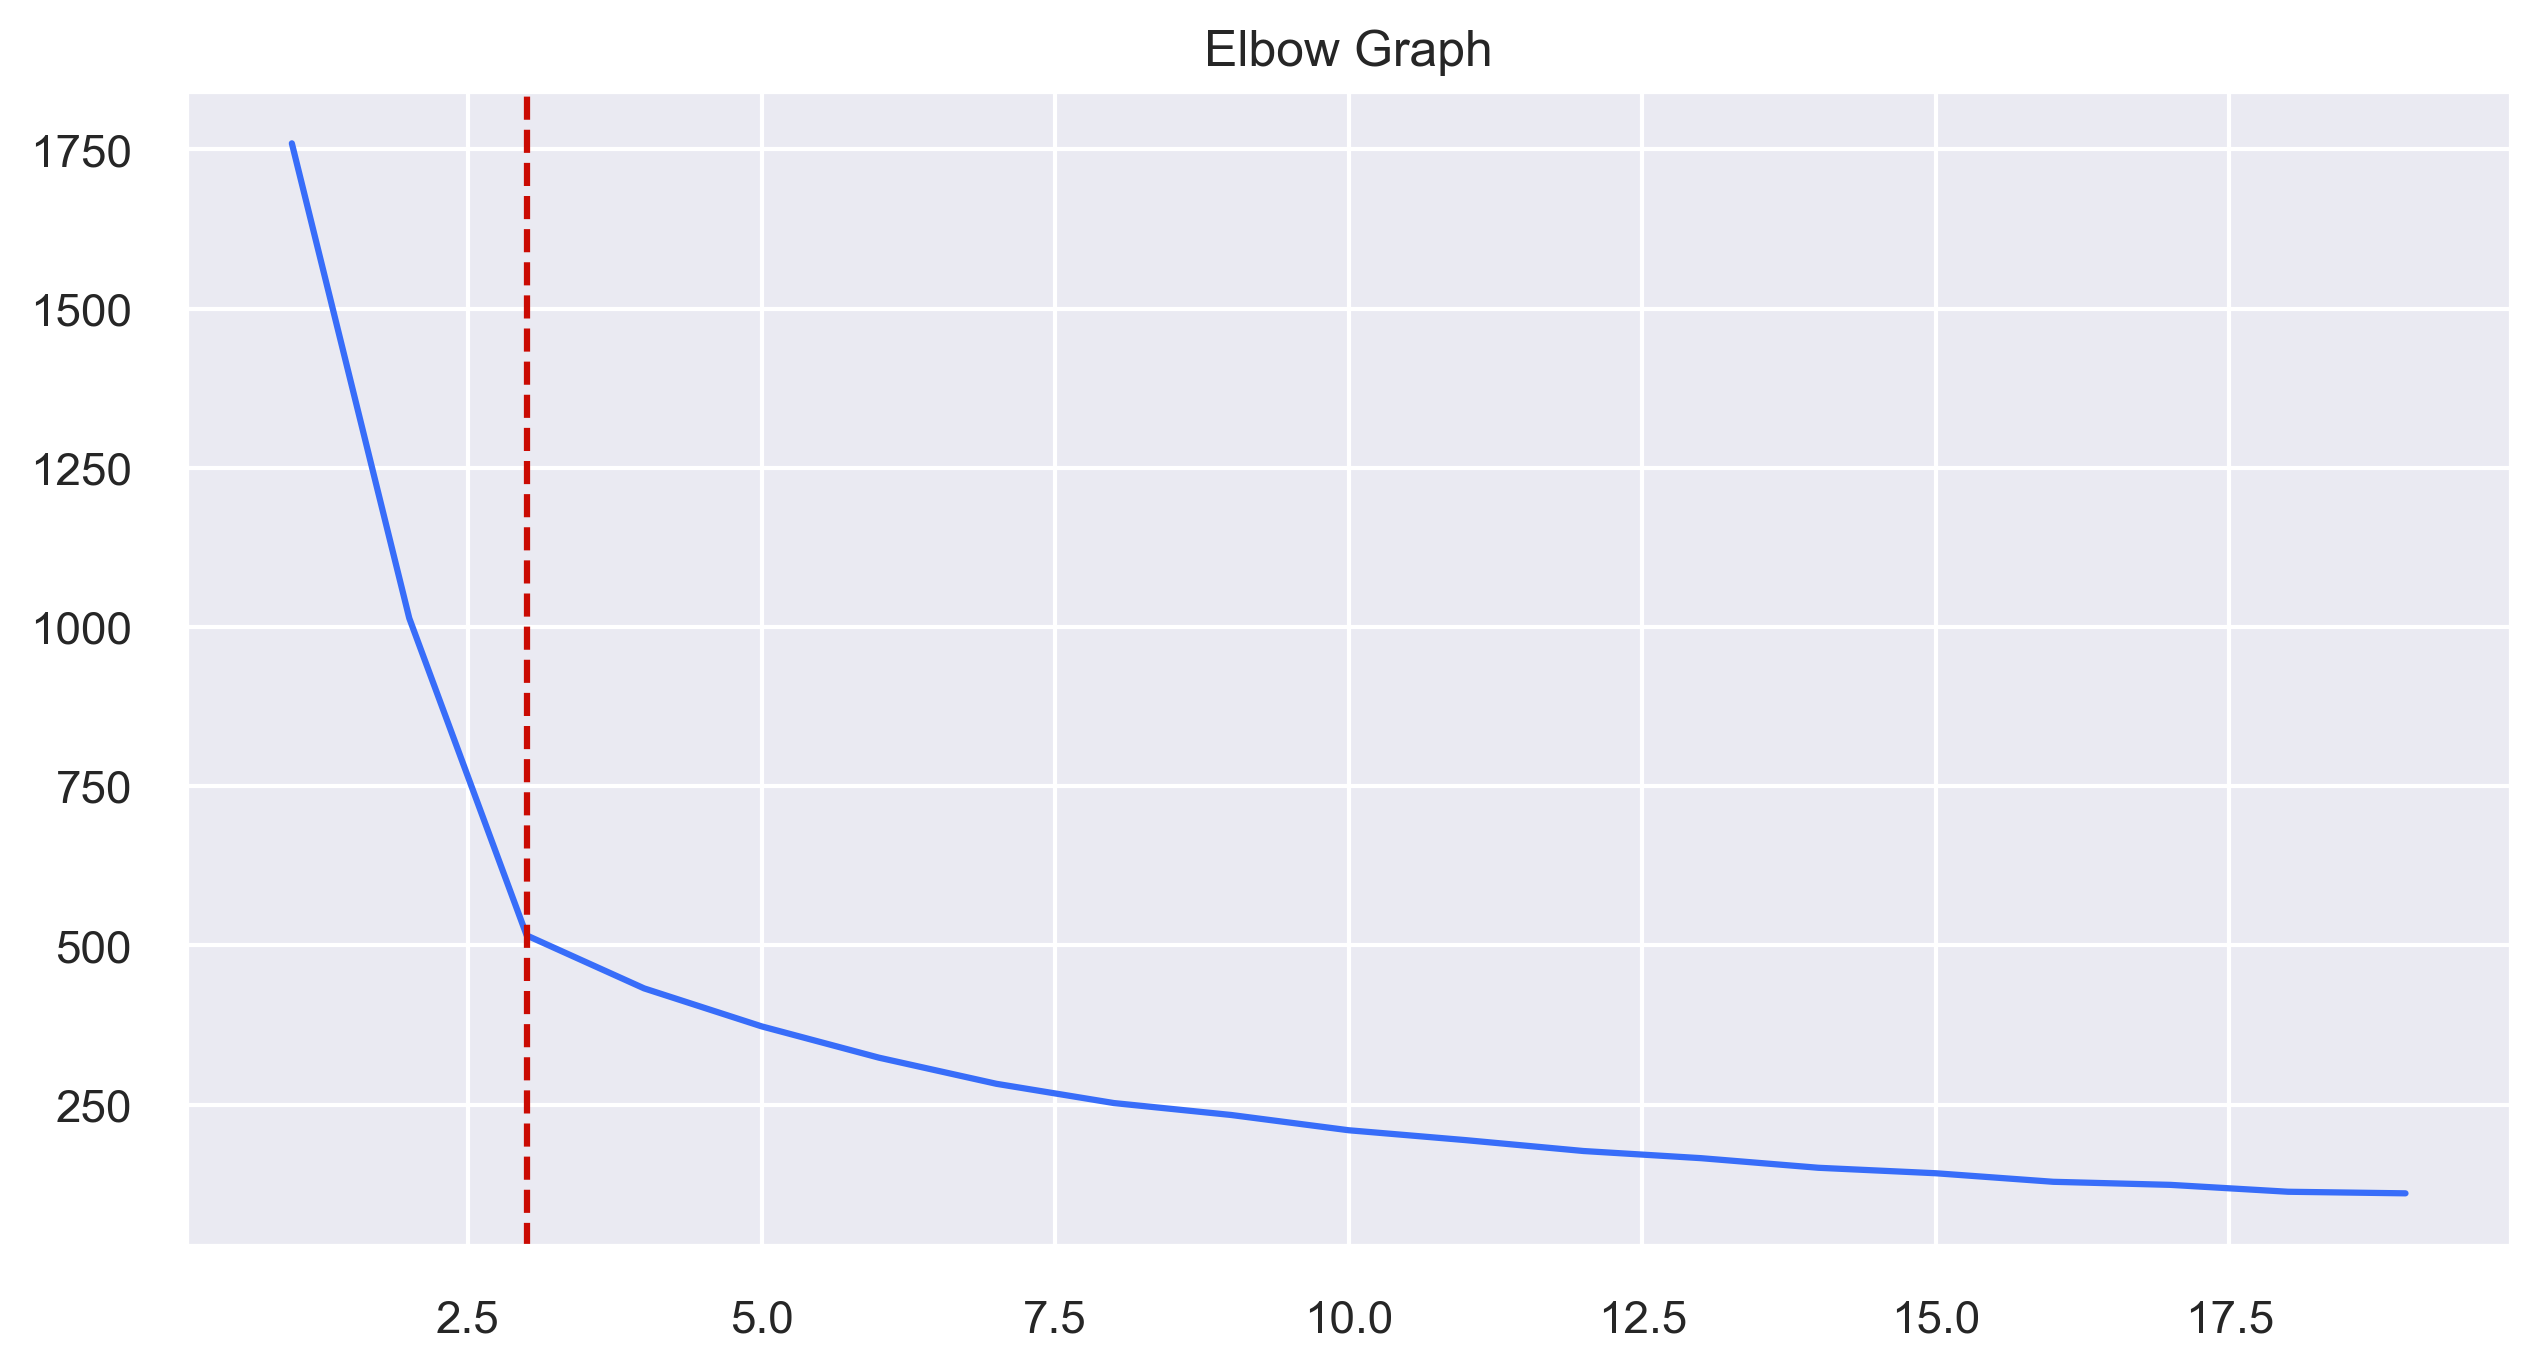

In [50]:

plt.plot(range(1,20),wcss)
plt.title('Elbow Graph')
plt.axvline(3,linestyle='--',c='r')

Optimal number of cluster by elbow graph for pcs data is 3

In [68]:
# for original data
wcss_og = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled)
    wcss_og.append(km.inertia_)

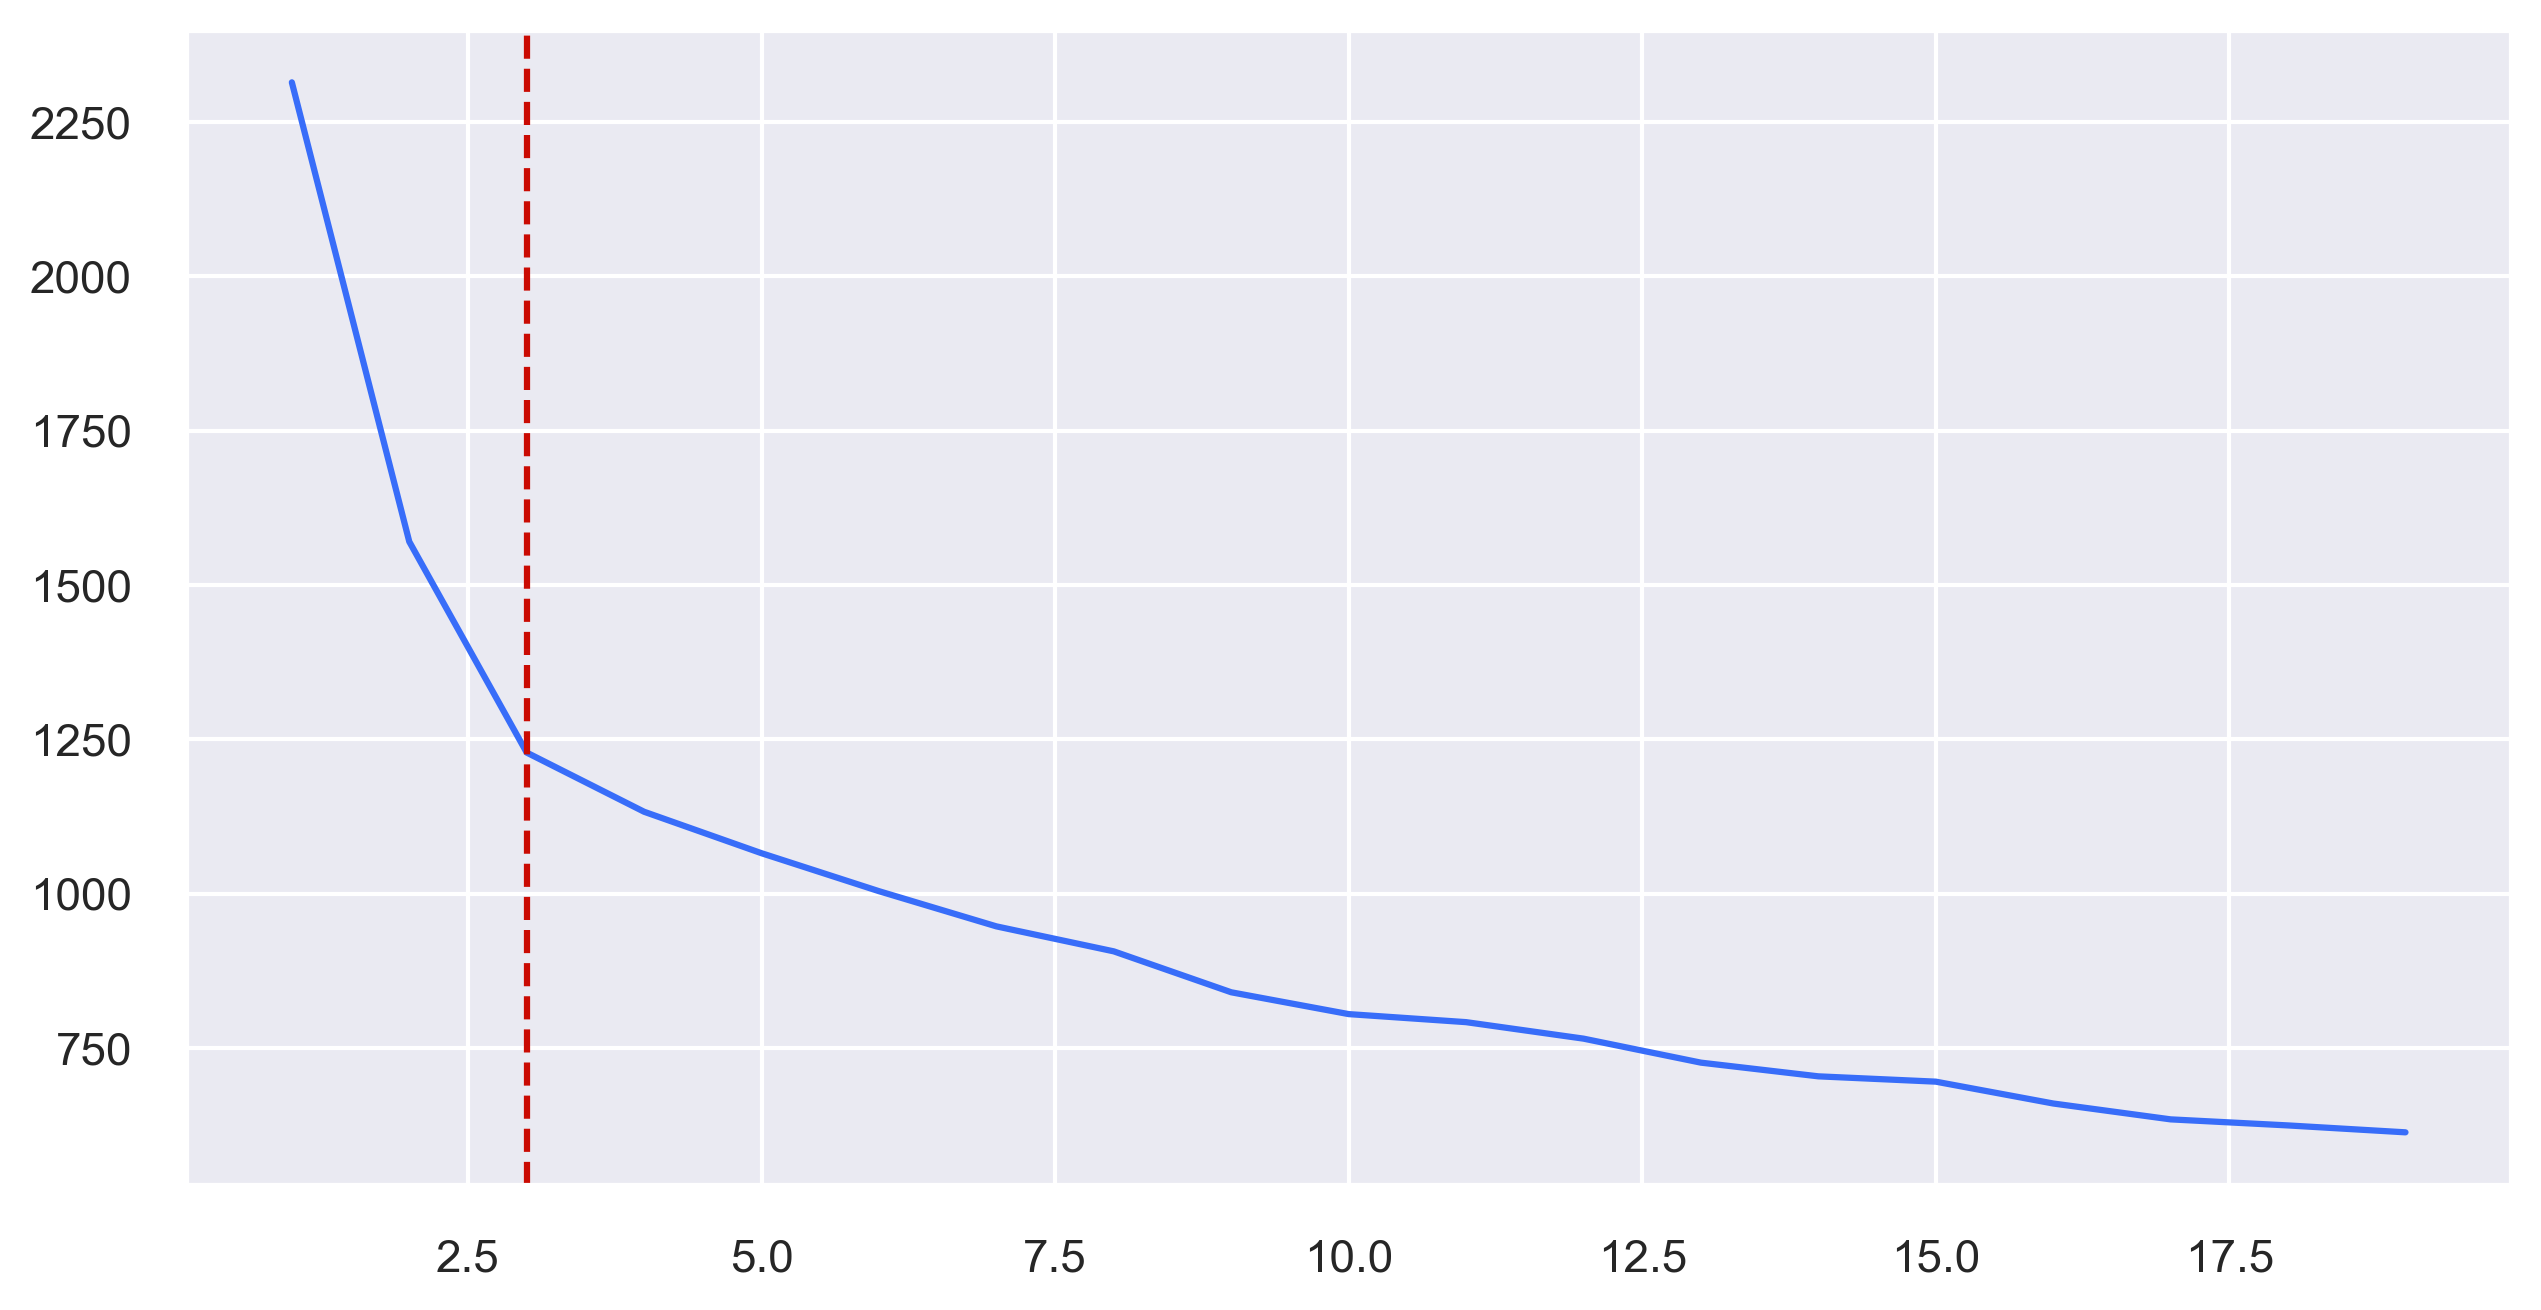

In [70]:
plt.plot(range(1,20),wcss_og)
plt.axvline(3,linestyle='--',c='r')
plt.show()

Optimal number of cluster by elbow graph for original data is 3

# Final Model


In [81]:
finalkmean= KMeans(n_clusters=3)
ypred = finalkmean.fit_predict(scaled)

In [82]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

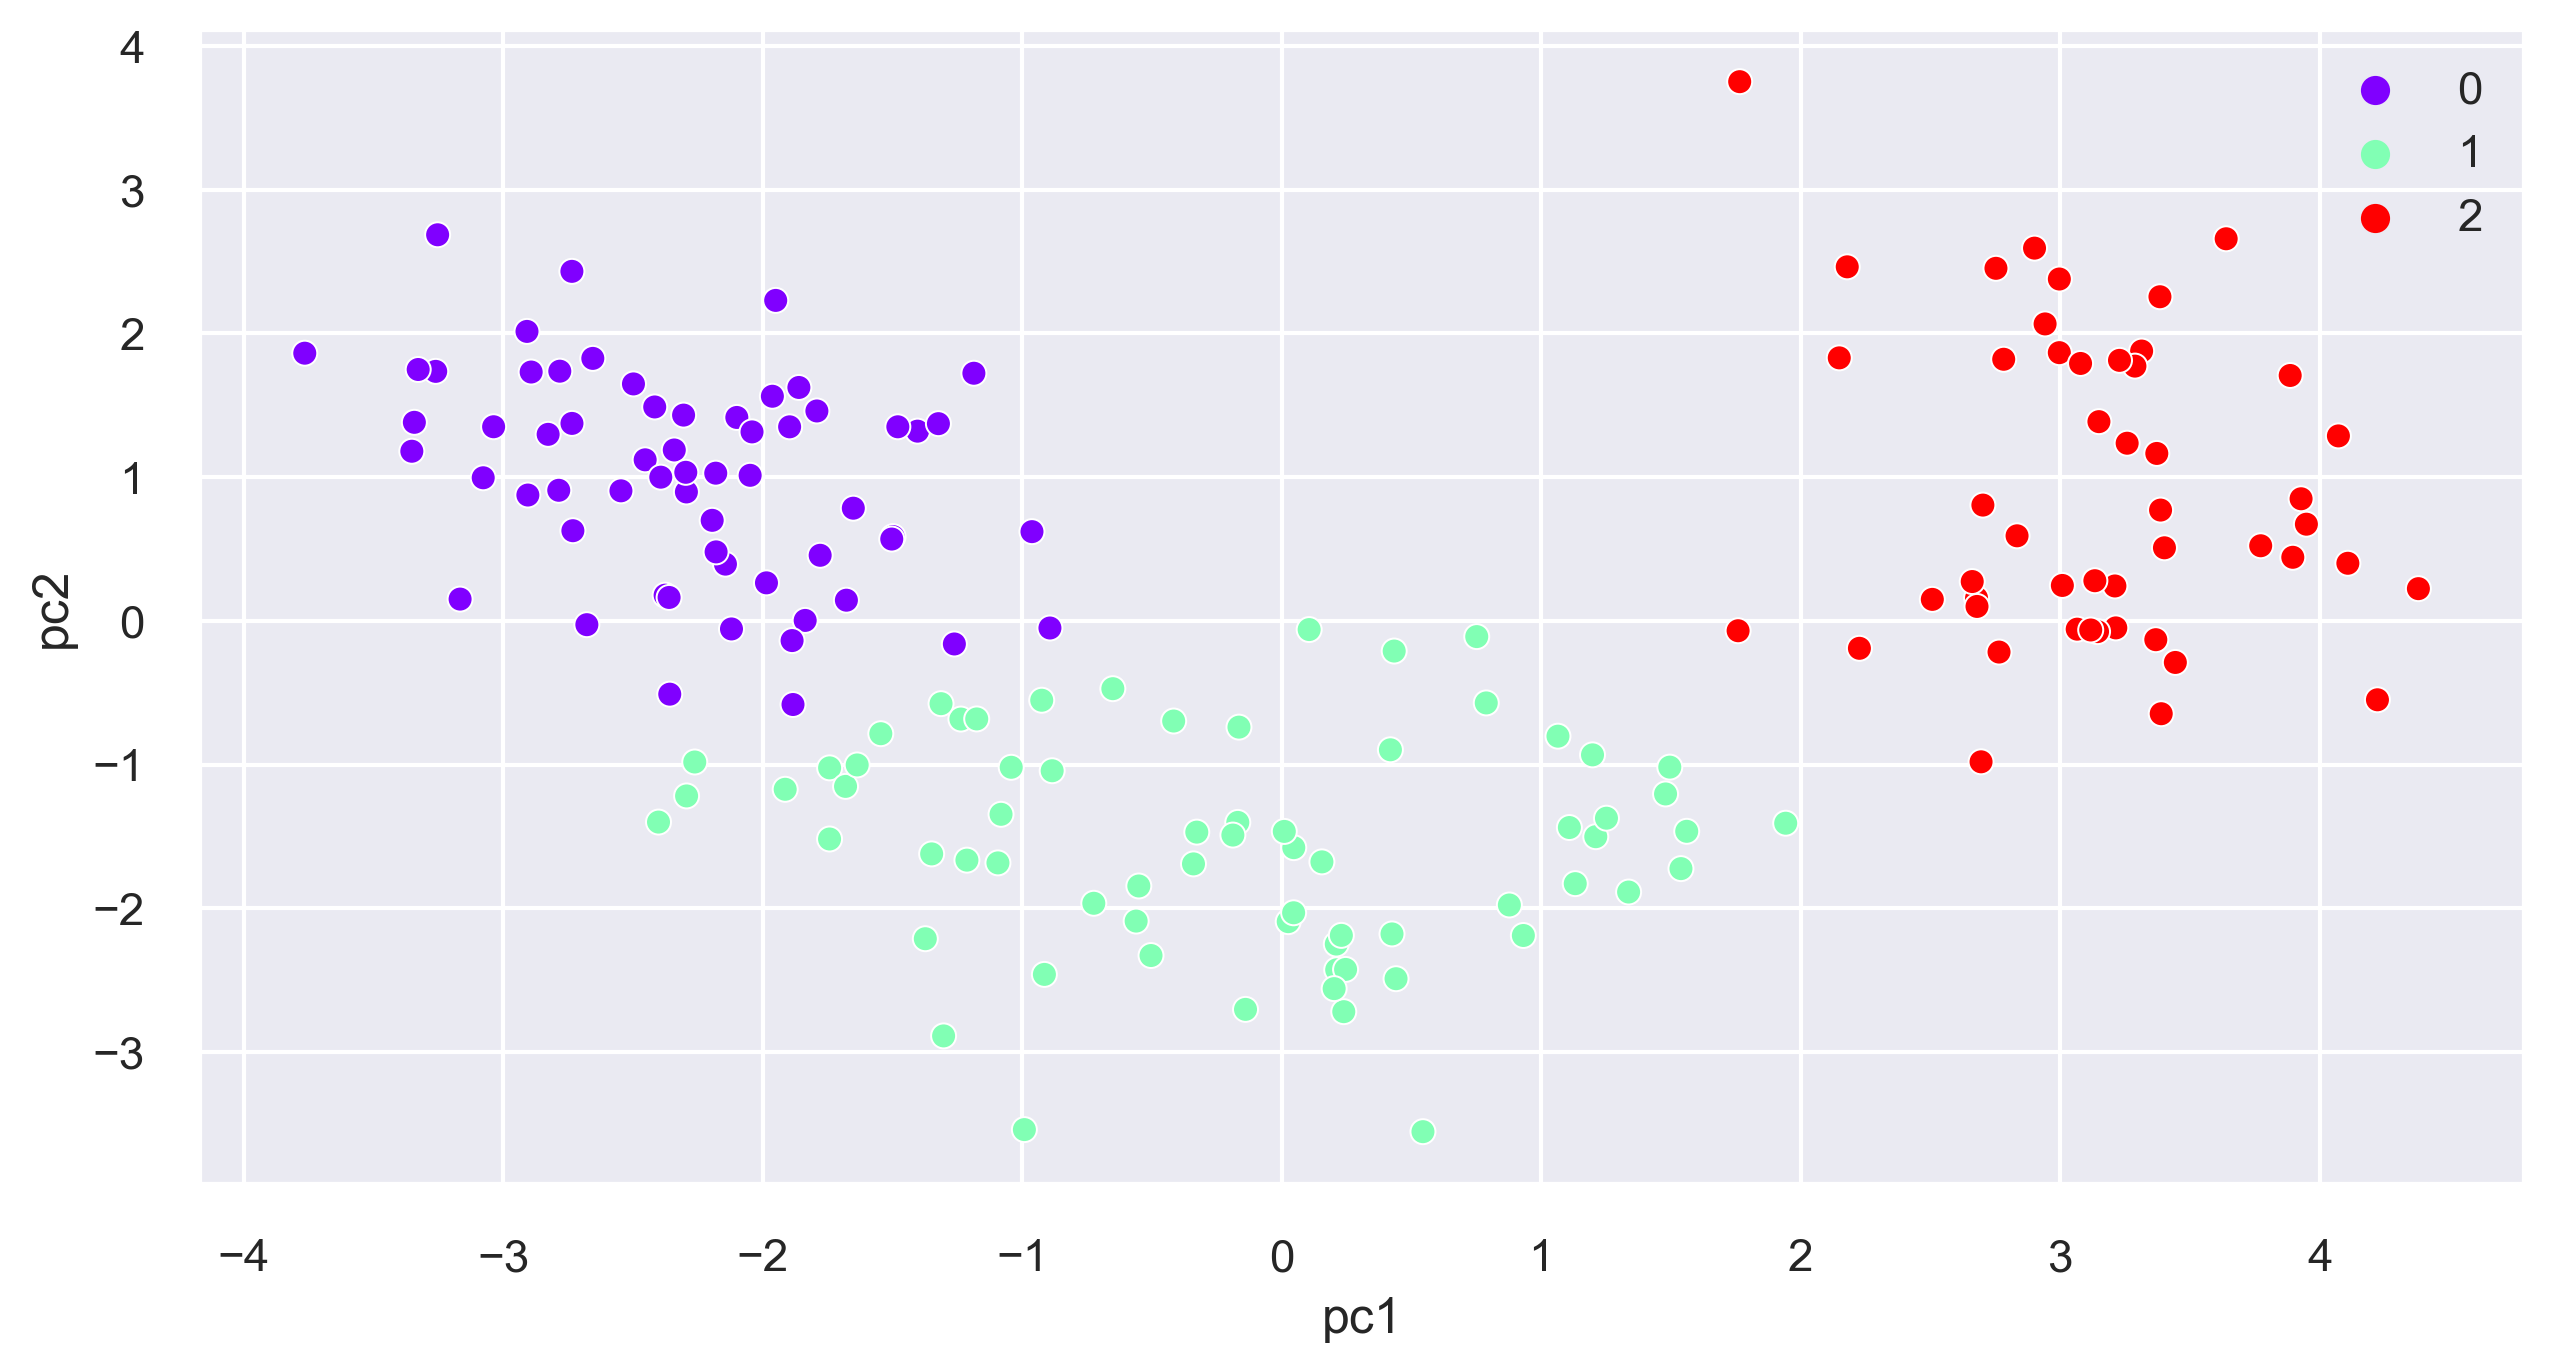

In [83]:
sns.scatterplot(x=pcs['pc1'],y=pcs['pc2'],hue = ypred, palette='rainbow')

In [84]:
silhouette_score(pcs,ypred)

0.4866716257679349

In [85]:
pcs['cluster_km']=ypred

In [87]:
pcs.groupby('cluster_km')[['pc1','pc2','pc3']].agg('mean',numeric_only=True)

,pc1,pc2,pc3
cluster_km,,,
0,-2.287768,1.003655,0.001015
1,-0.209040,-1.548863,0.164116
2,3.138134,0.899995,-0.229016


# Silhouette visualizer

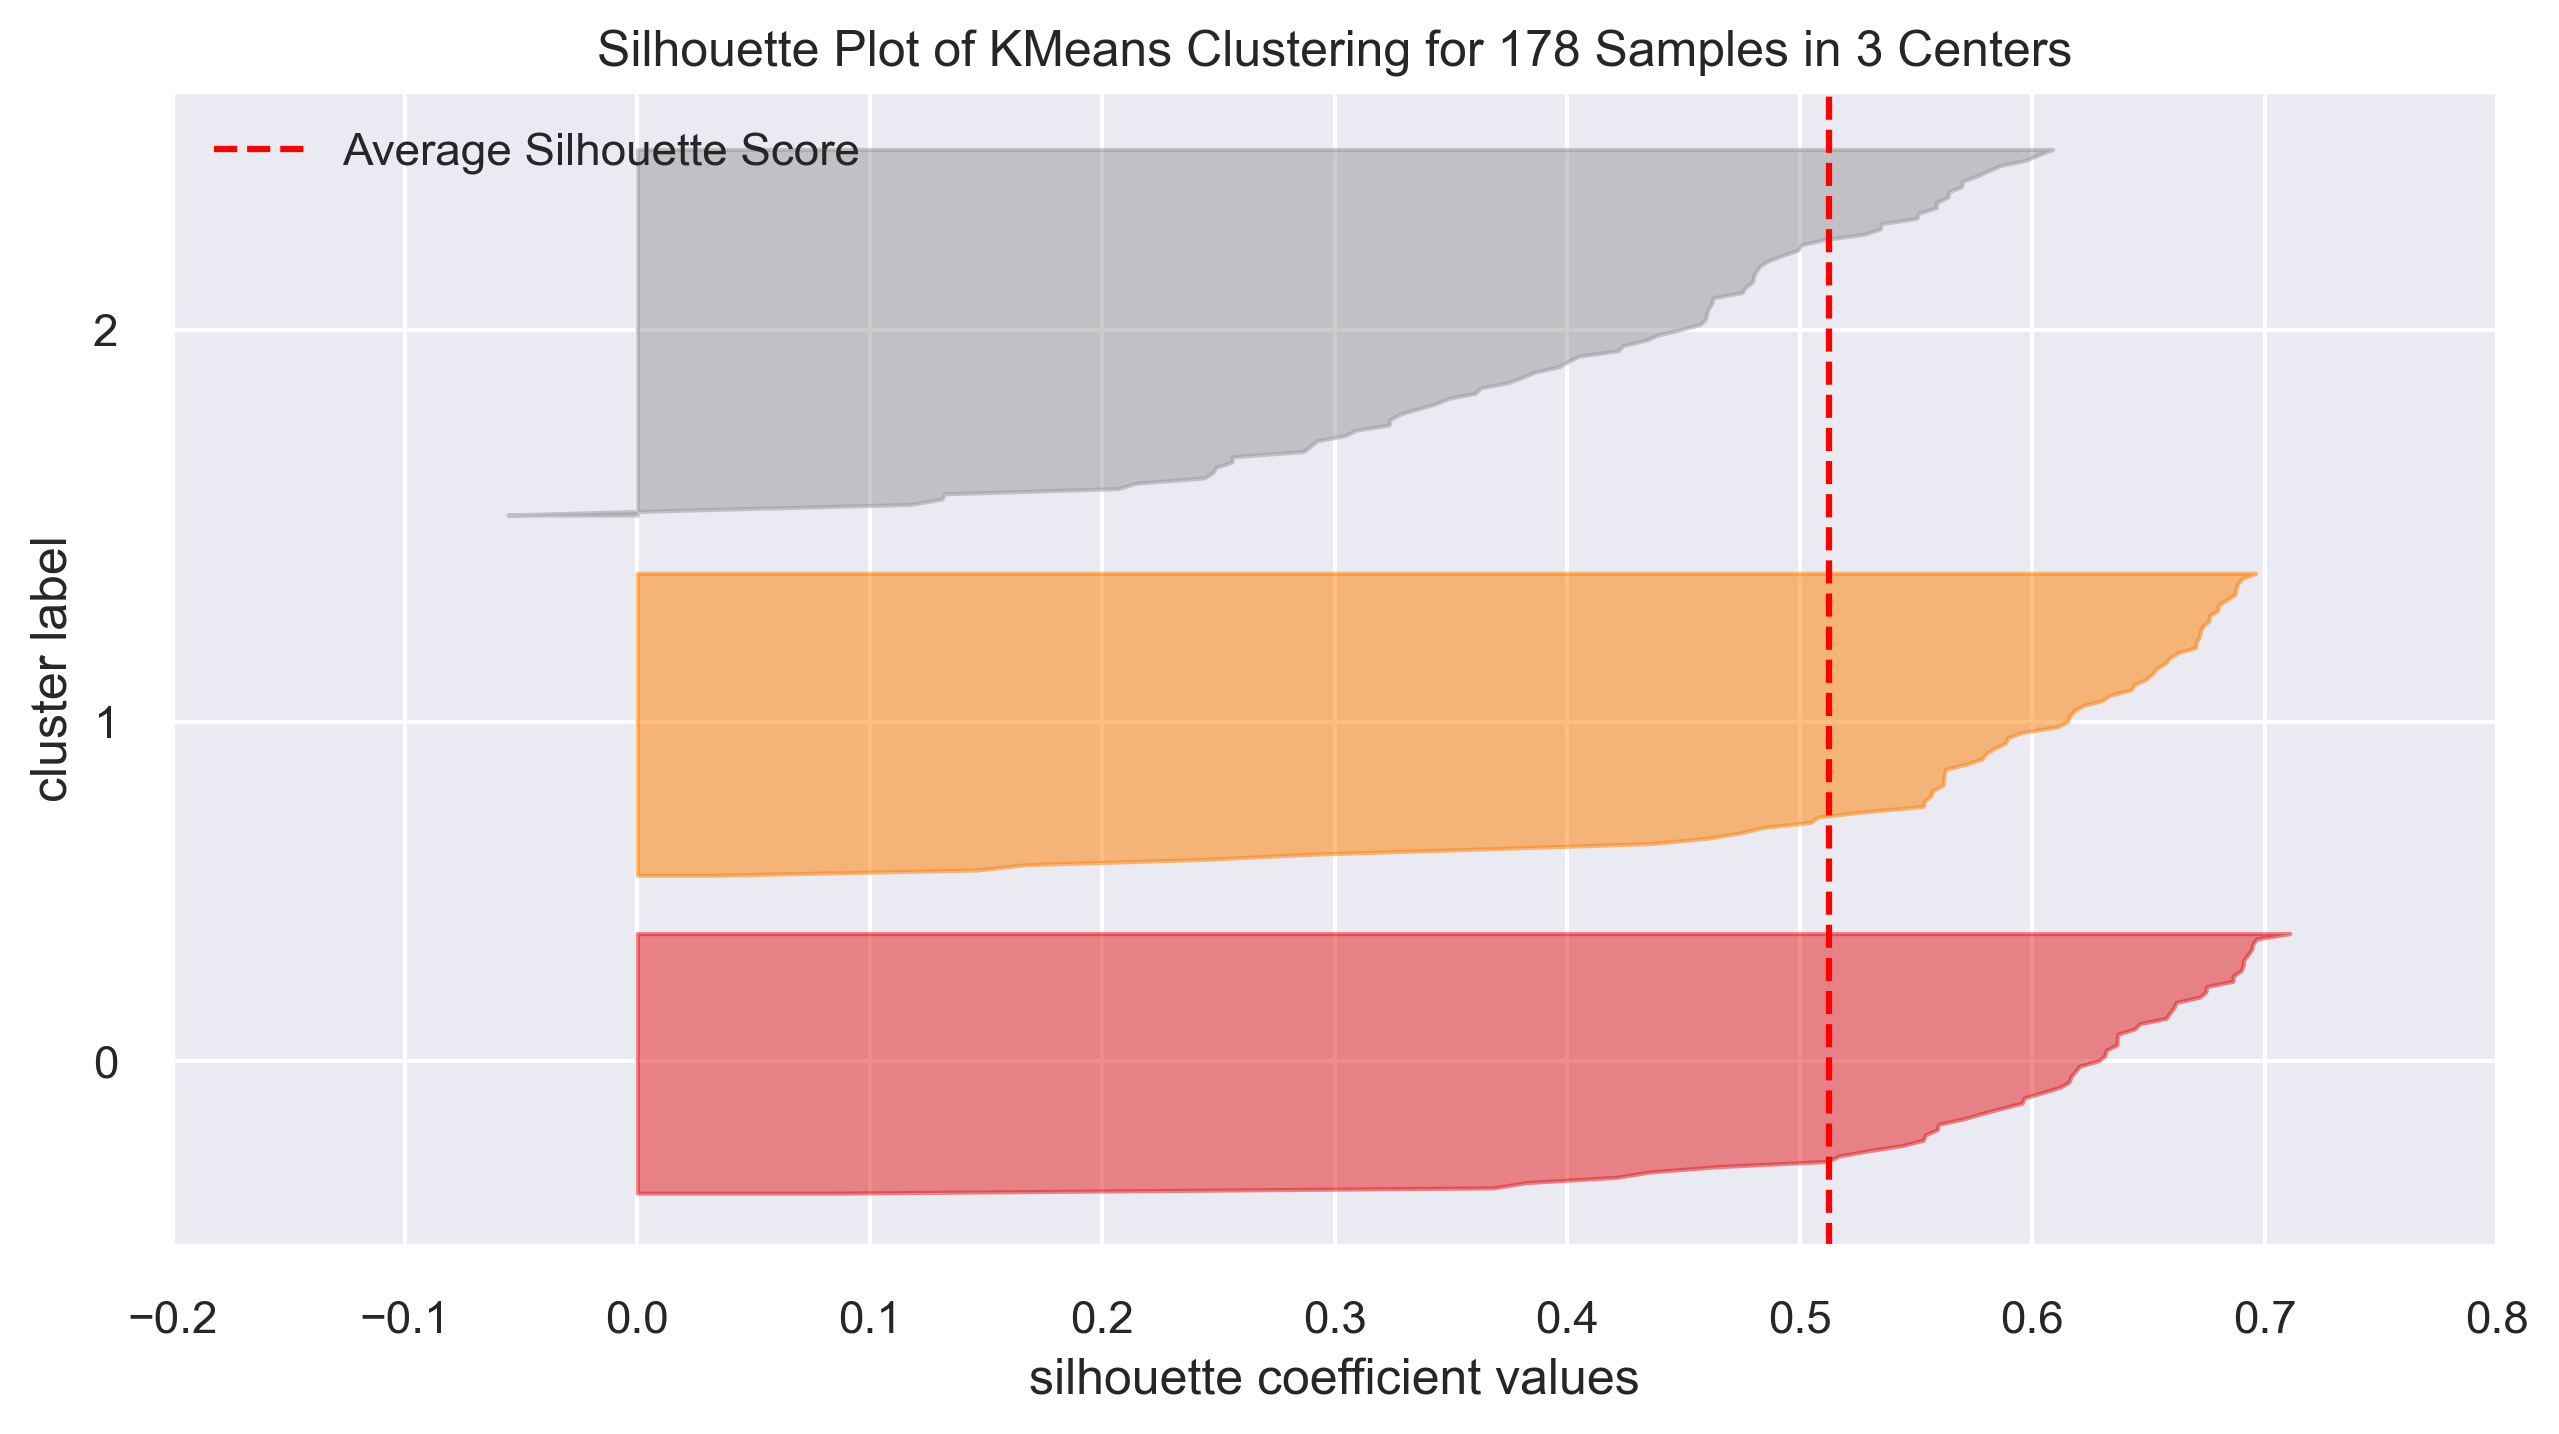

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [88]:
model = SilhouetteVisualizer(KMeans(n_clusters=3))
vis = model.fit(pcs)
vis.show()